<a href="https://colab.research.google.com/github/ScientistLim/ProjectAW/blob/feature%2Fdata-augmentation-Lim/time%26Magnitude_Warping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 증강(jittering/time_warping)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 원본 데이터 증강

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from google.colab import files

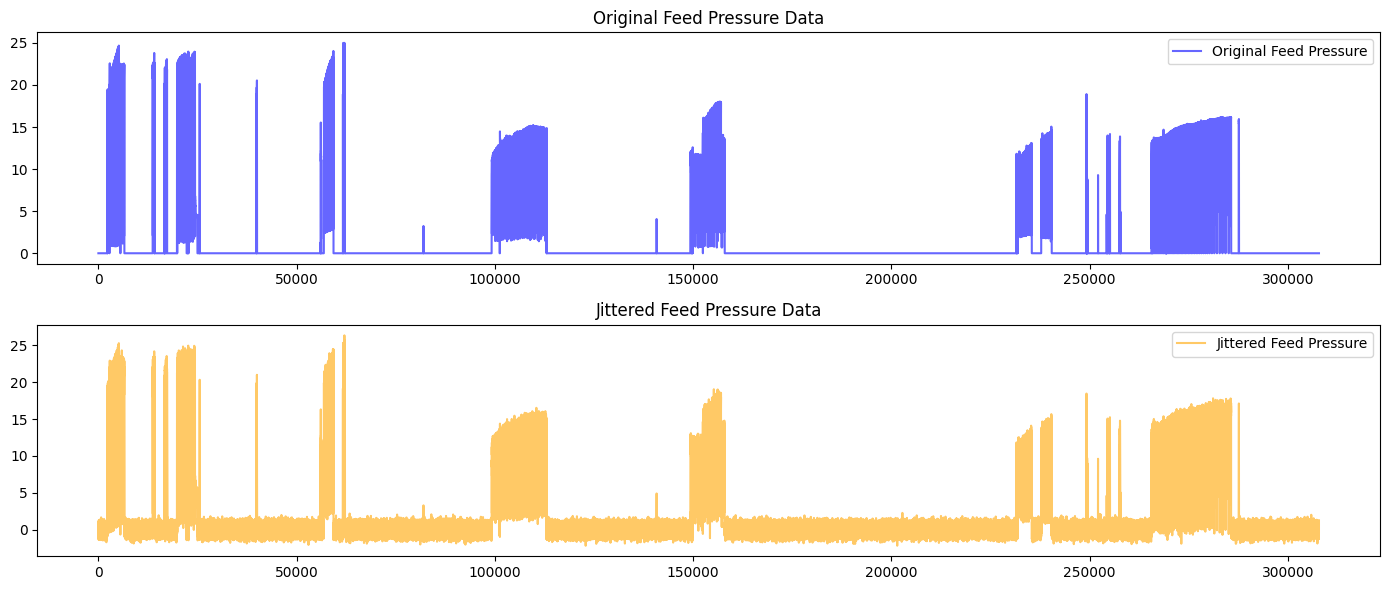

In [ ]:
# 1. 시각화를 위한 설정
%matplotlib inline

# 2. CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/수정된 데이터/시각_유입량_압력.csv'
df = pd.read_csv(file_name)

# 3. 압력 변수 'PIT.PIT_03.PV' 열 선택 (압력 변수만 사용)
df = df[['PIT.PIT_03.PV']]
df.columns = ['feed_pressure']  # 열 이름을 사용하기 쉽게 변경

# 4. Jittering 적용 함수 정의 (노이즈 추가)
def apply_jittering(df, noise_level=0.01):
    jittered_df = df.copy()
    jittered_df['feed_pressure'] += np.random.normal(0, noise_level, df.shape[0])
    return jittered_df

# Jittering 적용 (노이즈 레벨 설정 가능)
df_jittered = apply_jittering(df, noise_level=0.5)

# 원본 데이터 시각화
plt.figure(figsize=(14, 6))

# 1. 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.legend()

# 2. Jittered 데이터 그래프
plt.subplot(2, 1, 2)
plt.plot(df_jittered['feed_pressure'], label='Jittered Feed Pressure', color='orange', alpha=0.6)
plt.title('Jittered Feed Pressure Data')
plt.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()

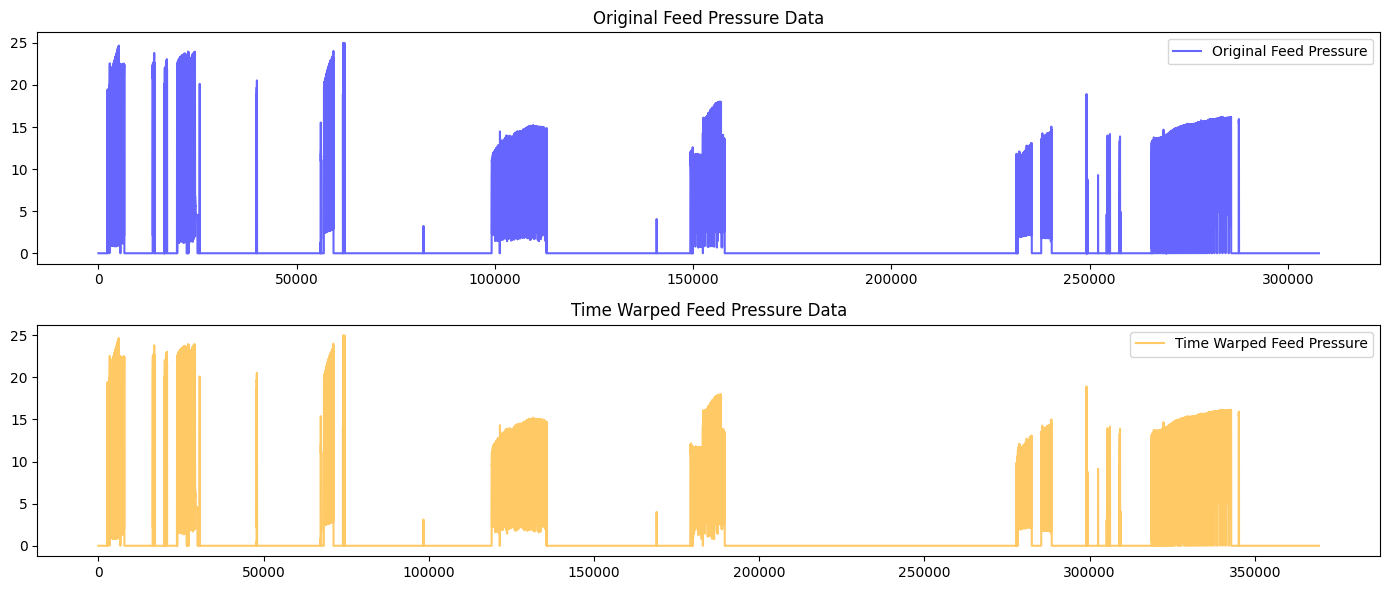

In [ ]:
# 1. 시각화를 위한 설정
%matplotlib inline

# 2. CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/수정된 데이터/시각_유입량_압력.csv'
df = pd.read_csv(file_name)

# 3. 압력 변수 'PIT.PIT_03.PV' 열 선택 (압력 변수만 사용)
df = df[['PIT.PIT_03.PV']]
df.columns = ['feed_pressure']  # 열 이름을 사용하기 쉽게 변경

# Time Warping 적용 함수 정의
def time_warping(df, warp_factor=1.5):
    original_index = np.arange(df.shape[0])
    warped_index = np.linspace(0, df.shape[0]-1, int(df.shape[0] * warp_factor))

    interpolated_feed_pressure = interp1d(original_index, df['feed_pressure'], kind='linear', fill_value="extrapolate")(warped_index)

    # Time Warping 결과를 새로운 데이터프레임으로 반환
    warped_df = pd.DataFrame(interpolated_feed_pressure, columns=['feed_pressure'])
    return warped_df

# Time Warping 적용
df_time_warped = time_warping(df, warp_factor=1.2)

# 원본 데이터와 Time Warping 적용 데이터 시각화
plt.figure(figsize=(14, 6))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.legend()

# Time Warping 적용 데이터 그래프
plt.subplot(2, 1, 2)
plt.plot(df_time_warped['feed_pressure'], label='Time Warped Feed Pressure', color='orange', alpha=0.6)
plt.title('Time Warped Feed Pressure Data')
plt.legend()

plt.tight_layout()
plt.show()

## 수정된 데이터 증강

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
from scipy.interpolate import interp1d

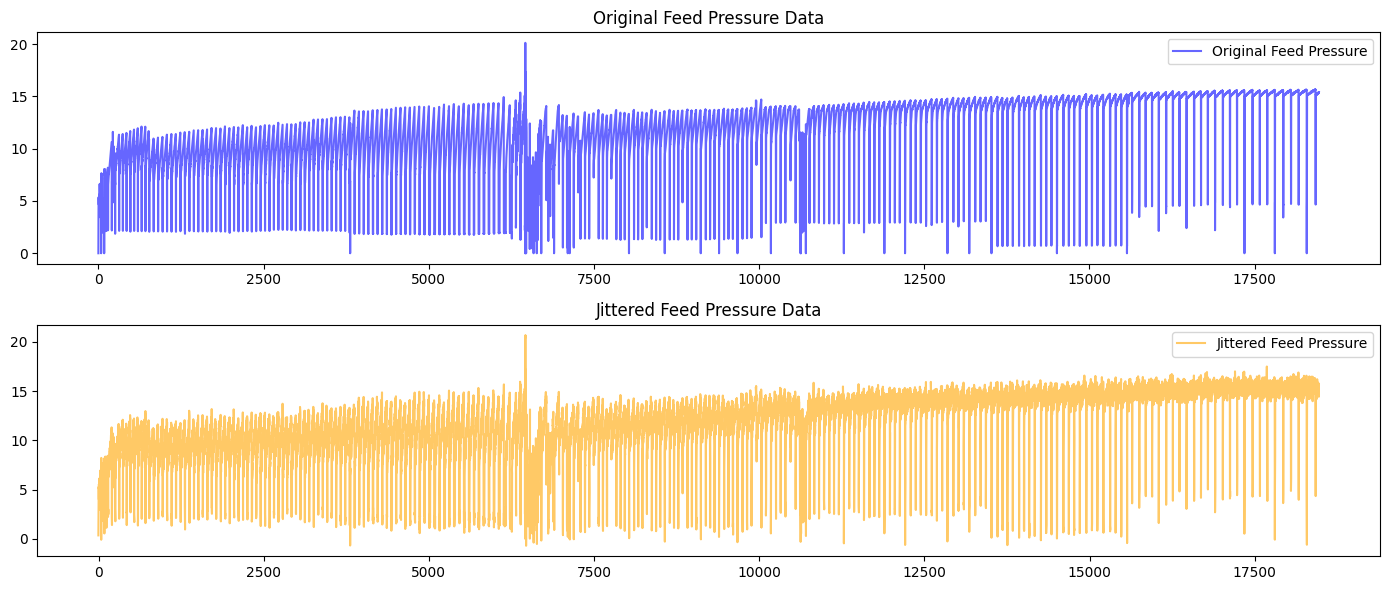

In [ ]:
# 1. 시각화를 위한 설정
%matplotlib inline

# 2. CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/전처리 데이터/pressure_data.csv'
df = pd.read_csv(file_name)

# 3. 압력 변수 'PIT.PIT_03.PV' 열 선택 (압력 변수만 사용)
df = df[['feed pressure']]
df.columns = ['feed_pressure']  # 열 이름을 사용하기 쉽게 변경

# Jittering 적용 함수 정의 (노이즈 추가 및 시간 이동)
def apply_jittering(df, noise_level=0.01, time_shift=1):
    jittered_df = df.copy()
    jittered_df['feed_pressure'] += np.random.normal(0, noise_level, df.shape[0])  # 노이즈 추가
    jittered_df.index = jittered_df.index + np.random.randint(-time_shift, time_shift, size=df.shape[0])  # 시간 이동
    return jittered_df

# Jittering 적용 (노이즈 레벨 설정 가능)
df_jittered = apply_jittering(df, noise_level=0.5, time_shift=2)

# 원본 데이터 시각화
plt.figure(figsize=(14, 6))

# 1. 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.legend()

# 2. Jittered 데이터 그래프
plt.subplot(2, 1, 2)
plt.plot(df_jittered['feed_pressure'], label='Jittered Feed Pressure', color='orange', alpha=0.6)
plt.title('Jittered Feed Pressure Data')
plt.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()

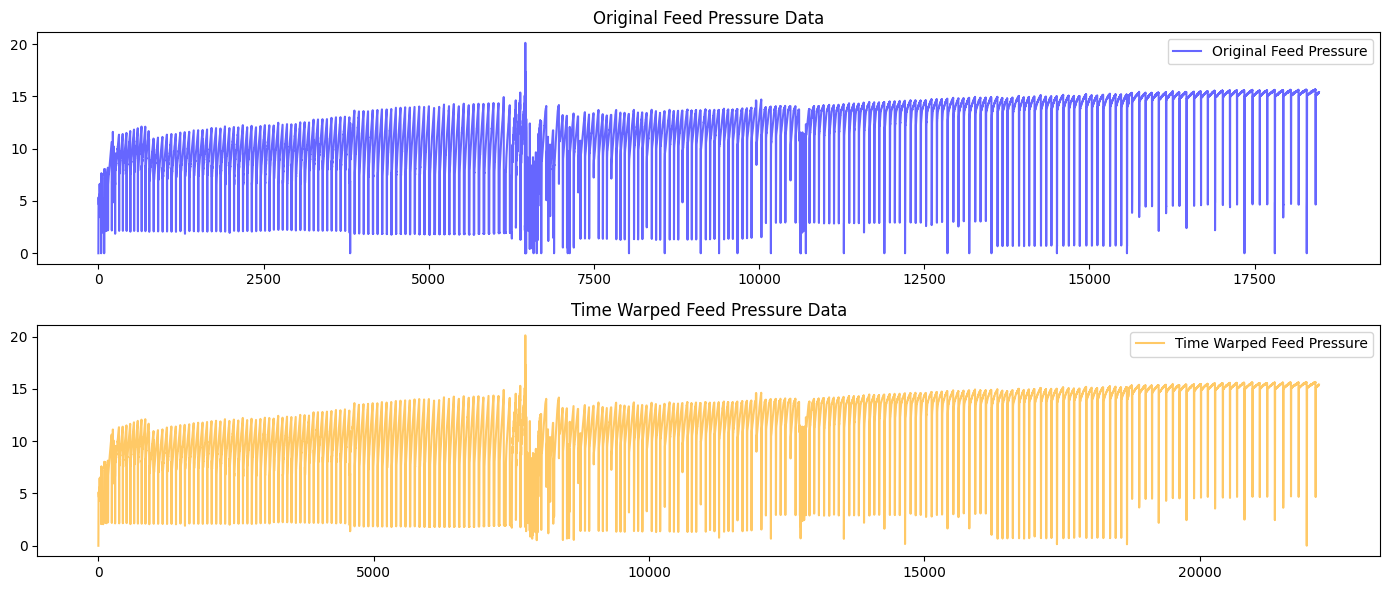

In [ ]:
# 1. 시각화를 위한 설정
%matplotlib inline

# 2. CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/전처리 데이터/pressure_data.csv'
df = pd.read_csv(file_name)

# 3. 압력 변수 'PIT.PIT_03.PV' 열 선택 (압력 변수만 사용)
df = df[['feed pressure']]
df.columns = ['feed_pressure']  # 열 이름을 사용하기 쉽게 변경

# Time Warping 적용 함수 정의
def time_warping(df, warp_factor=1.5):
    original_index = np.arange(df.shape[0])
    warped_index = np.linspace(0, df.shape[0]-1, int(df.shape[0] * warp_factor))

    interpolated_feed_pressure = interp1d(original_index, df['feed_pressure'], kind='linear', fill_value="extrapolate")(warped_index)

    # Time Warping 결과를 새로운 데이터프레임으로 반환
    warped_df = pd.DataFrame(interpolated_feed_pressure, columns=['feed_pressure'])
    return warped_df

# Time Warping 적용
df_time_warped = time_warping(df, warp_factor=1.2)

# 원본 데이터와 Time Warping 적용 데이터 시각화
plt.figure(figsize=(14, 6))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.legend()

# Time Warping 적용 데이터 그래프
plt.subplot(2, 1, 2)
plt.plot(df_time_warped['feed_pressure'], label='Time Warped Feed Pressure', color='orange', alpha=0.6)
plt.title('Time Warped Feed Pressure Data')
plt.legend()

plt.tight_layout()
plt.show()

## 최신 데이터 증강

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
from scipy.interpolate import interp1d

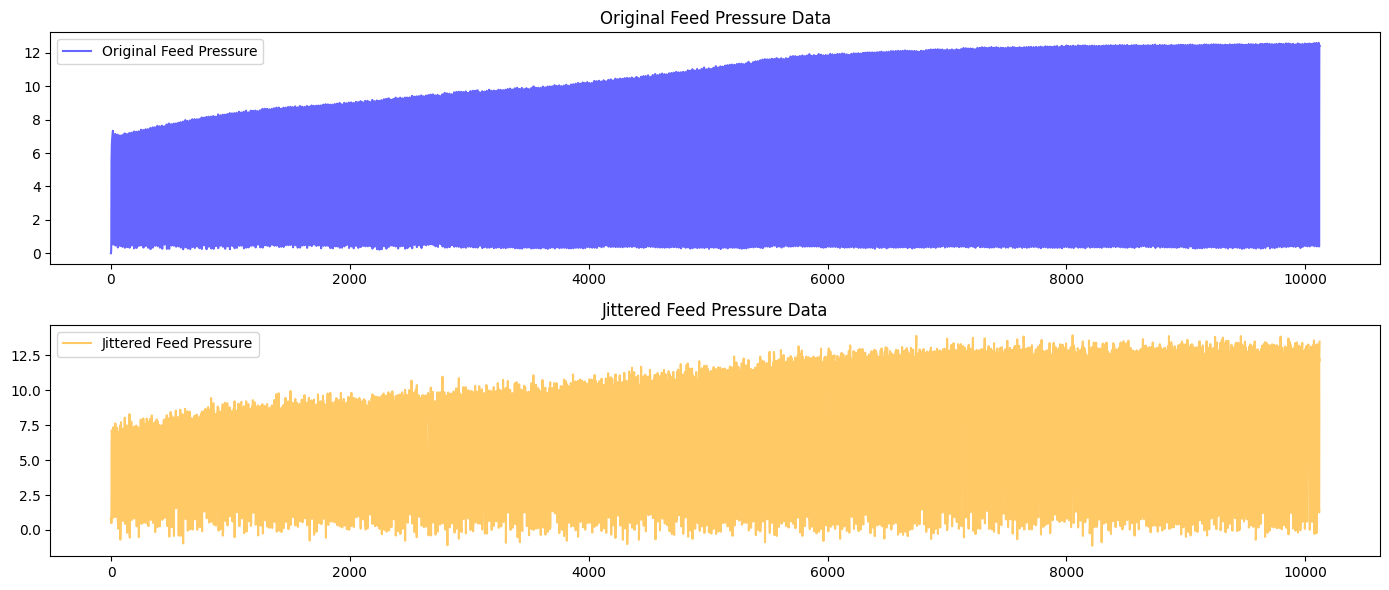

In [ ]:
# 1. 시각화를 위한 설정
%matplotlib inline

# 2. CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/최신_데이터/통합운전데이터.rev01.csv'
df = pd.read_csv(file_name, encoding='CP949')

# 3. 압력 변수 'PIT.PIT_03.PV' 열 선택 (압력 변수만 사용)
df = df[['RO유입 압력(bar)']]
df.columns = ['feed_pressure']  # 열 이름을 사용하기 쉽게 변경

# Jittering 적용 함수 정의 (노이즈 추가 및 시간 이동)
def apply_jittering(df, noise_level=0.01, time_shift=1):
    jittered_df = df.copy()
    jittered_df['feed_pressure'] += np.random.normal(0, noise_level, df.shape[0])  # 노이즈 추가
    jittered_df.index = jittered_df.index + np.random.randint(-time_shift, time_shift, size=df.shape[0])  # 시간 이동
    return jittered_df

# Jittering 적용 (노이즈 레벨 설정 가능)
df_jittered = apply_jittering(df, noise_level=0.5, time_shift=2)

# 원본 데이터 시각화
plt.figure(figsize=(14, 6))

# 1. 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.legend()

# 2. Jittered 데이터 그래프
plt.subplot(2, 1, 2)
plt.plot(df_jittered['feed_pressure'], label='Jittered Feed Pressure', color='orange', alpha=0.6)
plt.title('Jittered Feed Pressure Data')
plt.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()

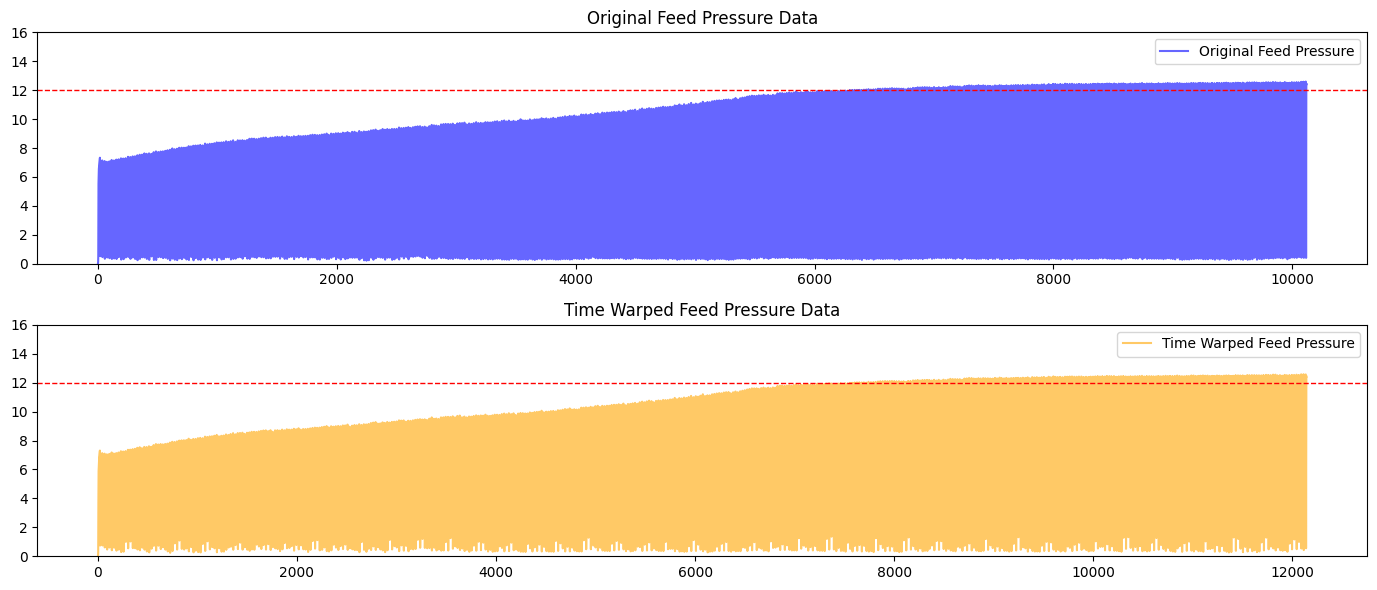

In [ ]:
# 1. 시각화를 위한 설정
%matplotlib inline

# 2. CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/최신_데이터/통합운전데이터.rev01.csv'
df = pd.read_csv(file_name, encoding='CP949')

# 3. 압력 변수 'PIT.PIT_03.PV' 열 선택 (압력 변수만 사용)
df = df[['RO유입 압력(bar)']]
df.columns = ['feed_pressure']  # 열 이름을 사용하기 쉽게 변경

# Time Warping 적용 함수 정의
def time_warping(df, warp_factor=1.5):
    original_index = np.arange(df.shape[0])
    warped_index = np.linspace(0, df.shape[0]-1, int(df.shape[0] * warp_factor))

    interpolated_feed_pressure = interp1d(original_index, df['feed_pressure'], kind='linear', fill_value="extrapolate")(warped_index)

    # Time Warping 결과를 새로운 데이터프레임으로 반환
    warped_df = pd.DataFrame(interpolated_feed_pressure, columns=['feed_pressure'])
    return warped_df

# Time Warping 적용
df_time_warped = time_warping(df, warp_factor=1.2)

# 원본 데이터와 Time Warping 적용 데이터 시각화
plt.figure(figsize=(14, 6))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.axhline(y=12, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 16)

# Time Warping 적용 데이터 그래프
plt.subplot(2, 1, 2)
plt.plot(df_time_warped['feed_pressure'], label='Time Warped Feed Pressure', color='orange', alpha=0.6)
plt.title('Time Warped Feed Pressure Data')
plt.axhline(y=12, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 16)

plt.tight_layout()
plt.show()

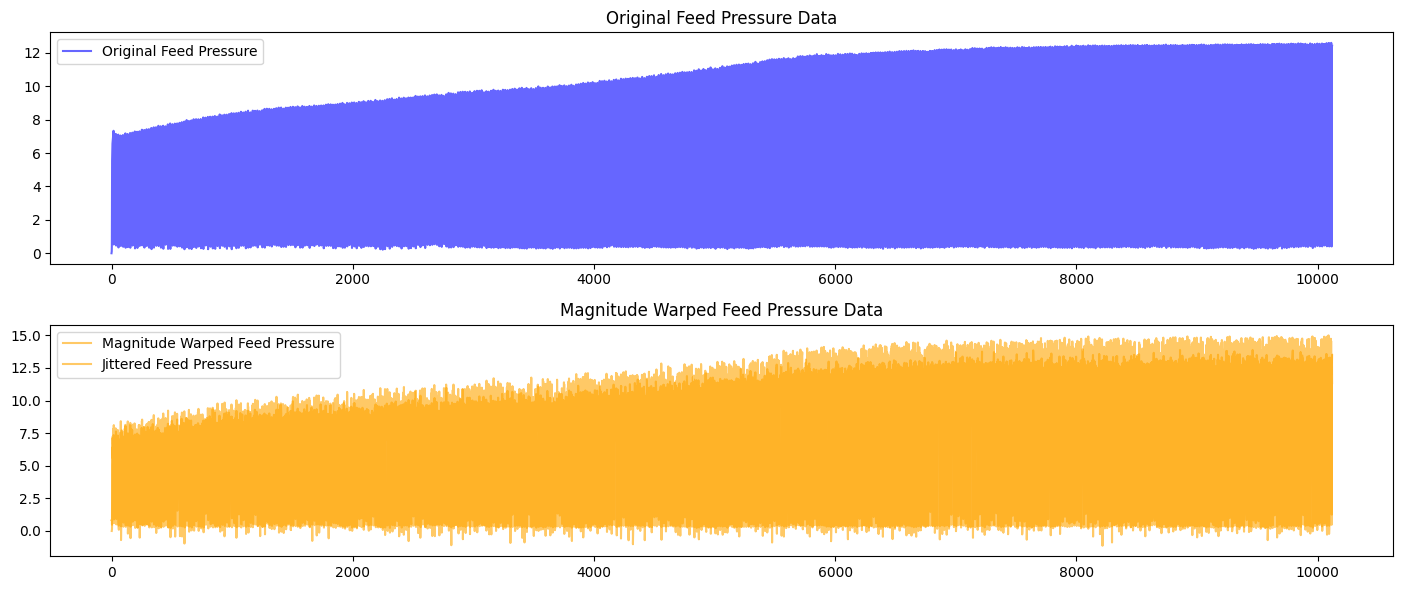

In [ ]:
# 1. 시각화를 위한 설정
%matplotlib inline

# 2. CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/최신_데이터/통합운전데이터.rev01.csv'
df = pd.read_csv(file_name, encoding='CP949')

# 3. 압력 변수 'PIT.PIT_03.PV' 열 선택 (압력 변수만 사용)
df = df[['RO유입 압력(bar)']]
df.columns = ['feed_pressure']  # 열 이름을 사용하기 쉽게 변경

# Magnitude Warping 적용 함수 정의
def magnitude_warping(df, factor_range=(0.8, 1.2)):
    factor = np.random.uniform(factor_range[0], factor_range[1], df.shape[0])
    warped_df = df.copy()
    warped_df['feed_pressure'] *= factor
    return warped_df

# Magnitude Warping 적용
df_magnitude_warped = magnitude_warping(df)

# 원본 데이터와 Magnitude Warping 적용 데이터 시각화
plt.figure(figsize=(14, 6))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.legend()

# Magnitude Warping 적용 데이터 그래프
plt.subplot(2, 1, 2)
plt.plot(df_magnitude_warped['feed_pressure'], label='Magnitude Warped Feed Pressure', color='orange', alpha=0.6)
plt.title('Magnitude Warped Feed Pressure Data')
plt.plot(df_jittered['feed_pressure'], label='Jittered Feed Pressure', color='orange', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

## Time Warping와 Magnitude를 적용해보자

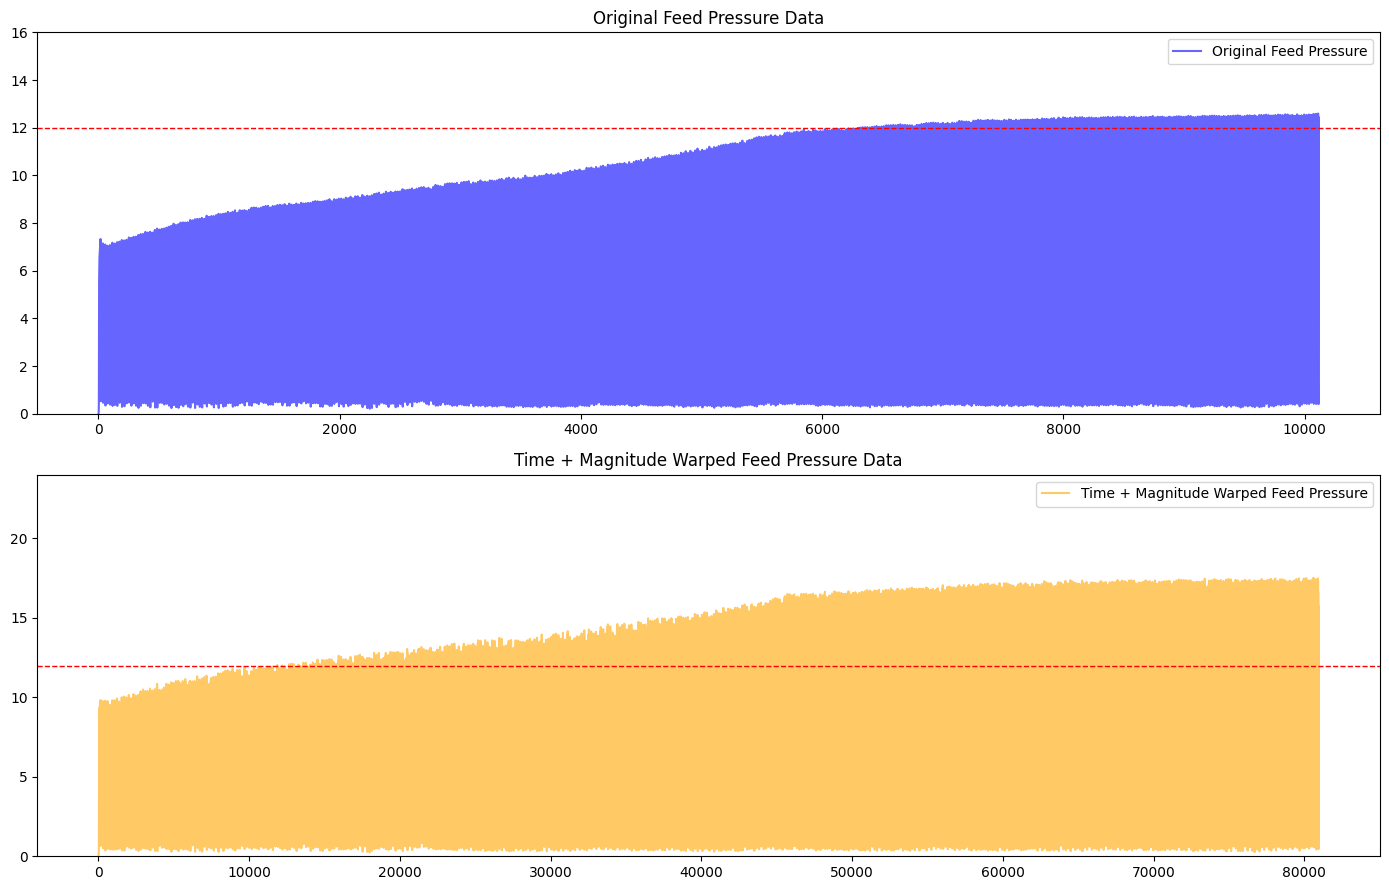

In [ ]:
# 1. 시각화를 위한 설정
%matplotlib inline

# 2. CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/최신_데이터/통합운전데이터.rev01.csv'
df = pd.read_csv(file_name, encoding='CP949')

# 3. 압력 변수 'RO유입 압력(bar)' 열 선택 (압력 변수만 사용)
df = df[['RO유입 압력(bar)']]
df.columns = ['feed_pressure']  # 열 이름을 사용하기 쉽게 변경

# Time Warping 적용 함수 정의
def time_warping(df, warp_factor=2.0):
    original_index = np.arange(df.shape[0])
    warped_index = np.linspace(0, df.shape[0]-1, int(df.shape[0] * warp_factor))

    interpolated_feed_pressure = interp1d(original_index, df['feed_pressure'], kind='linear', fill_value="extrapolate")(warped_index)

    # Time Warping 결과를 새로운 데이터프레임으로 반환
    warped_df = pd.DataFrame(interpolated_feed_pressure, columns=['feed_pressure'])
    return warped_df

# Magnitude Warping 적용 함수 정의
def magnitude_warping(df, factor_range=(0.8, 1.2)):
    factor = np.random.uniform(factor_range[0], factor_range[1], df.shape[0])
    warped_df = df.copy()
    warped_df['feed_pressure'] *= factor  # 각 구간마다 진폭 변형
    return warped_df

# Time Warping과 Magnitude Warping을 함께 적용하는 함수 정의
def time_and_magnitude_warping(df, warp_factor=1.2, factor_range=(1.0, 1.3)):
    df_time_warped = time_warping(df, warp_factor=warp_factor)

    df_time_magnitude_warped = magnitude_warping(df_time_warped, factor_range=factor_range)

    return df_time_magnitude_warped

# Time + Magnitude Warping 적용
df_time_magnitude_warped = time_and_magnitude_warping(df, warp_factor=8.0, factor_range=(1.0, 1.4))

# 원본 데이터와 Time + Magnitude Warping 적용 데이터 시각화
plt.figure(figsize=(14, 9))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.axhline(y=12, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 16)

# Time + Magnitude Warping 적용 데이터 그래프
plt.subplot(2, 1, 2)
plt.plot(df_time_magnitude_warped['feed_pressure'], label='Time + Magnitude Warped Feed Pressure', color='orange', alpha=0.6)
plt.title('Time + Magnitude Warped Feed Pressure Data')
plt.axhline(y=12, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 24)

plt.tight_layout()
plt.show()

### 이전값을 전혀 고려해보지 않고 증강한다.
### 이동평균과 시계열 모델을 사용해서 증강하는 기법을 생각해보자

## 이동평균

특정 구간의 데이터를 선택해 그 평균을 구하고, 그 구간을 계속 이동하면서 평균 값을 계산, 단기적인 변동을 제거하고 장기적인 추세를 파악

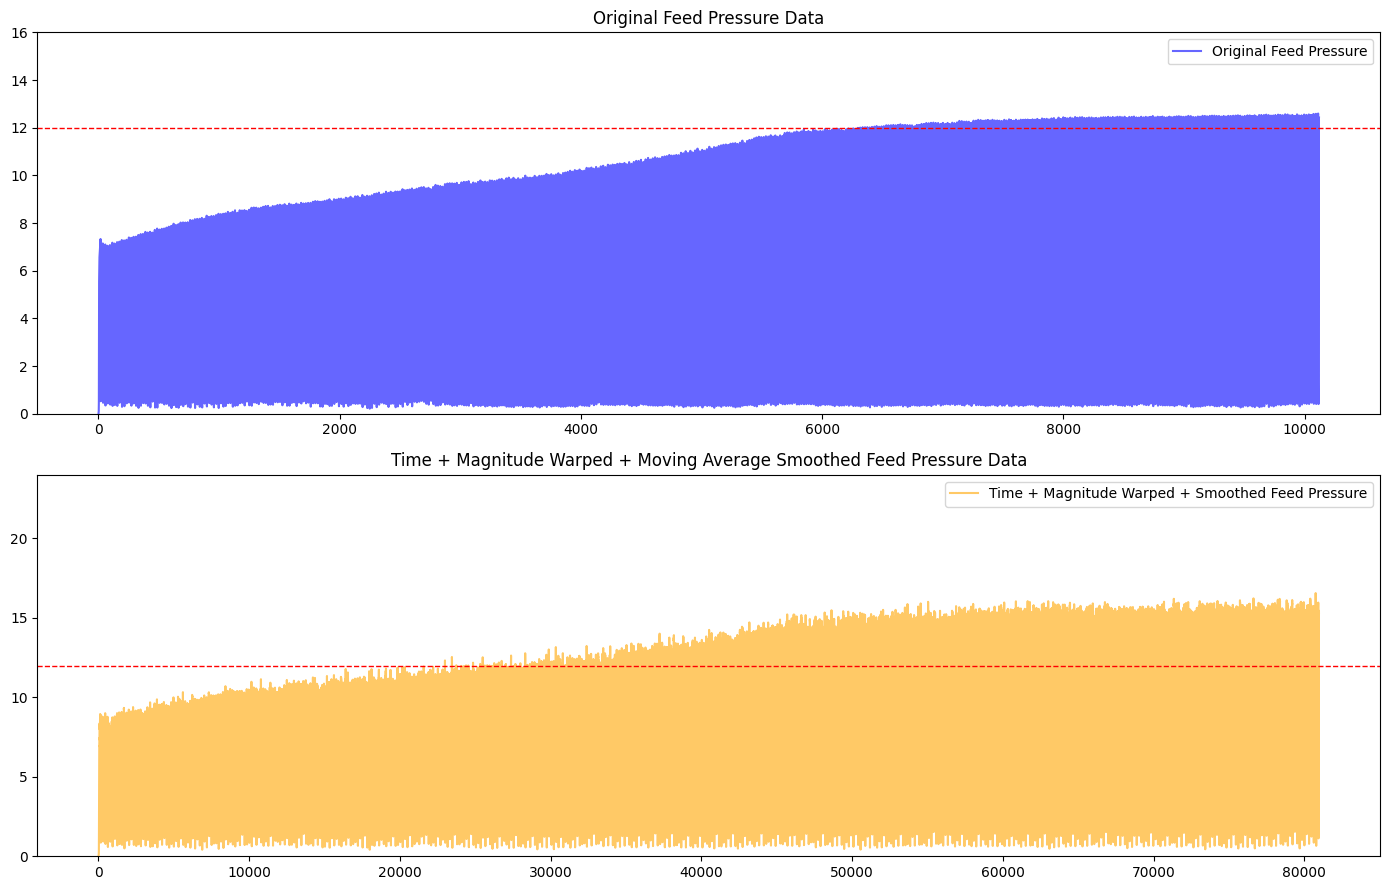

In [ ]:
# 1. 시각화를 위한 설정
%matplotlib inline

# 2. CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/최신_데이터/통합운전데이터.rev01.csv'
df = pd.read_csv(file_name, encoding='CP949')

# 3. 압력 변수 'RO유입 압력(bar)' 열 선택 (압력 변수만 사용)
df = df[['RO유입 압력(bar)']]
df.columns = ['feed_pressure']  # 열 이름을 사용하기 쉽게 변경

# Time Warping 적용 함수 정의
def time_warping(df, warp_factor=2.0):
    original_index = np.arange(df.shape[0])
    warped_index = np.linspace(0, df.shape[0]-1, int(df.shape[0] * warp_factor))

    interpolated_feed_pressure = interp1d(original_index, df['feed_pressure'], kind='linear', fill_value="extrapolate")(warped_index)

    # Time Warping 결과를 새로운 데이터프레임으로 반환
    warped_df = pd.DataFrame(interpolated_feed_pressure, columns=['feed_pressure'])
    return warped_df

# Magnitude Warping 적용 함수 정의
def magnitude_warping(df, factor_range=(0.8, 1.2)):
    factor = np.random.uniform(factor_range[0], factor_range[1], df.shape[0])
    warped_df = df.copy()
    warped_df['feed_pressure'] *= factor  # 각 구간마다 진폭 변형
    return warped_df

# 이동 평균(Moving Average) 적용 함수 정의
def apply_moving_average(df, window_size=5):
    df_smoothed = df.copy()
    df_smoothed['feed_pressure'] = df_smoothed['feed_pressure'].rolling(window=window_size, min_periods).mean()
    return df_smoothed

# Time Warping과 Magnitude Warping을 함께 적용하는 함수 정의
def time_and_magnitude_warping(df, warp_factor=1.2, factor_range=(1.0, 1.3), window_size=5):
    df_time_warped = time_warping(df, warp_factor=warp_factor)
    df_time_magnitude_warped = magnitude_warping(df_time_warped, factor_range=factor_range)
    df_time_magnitude_warped_smoothed = apply_moving_average(df_time_magnitude_warped, window_size=window_size)

    return df_time_magnitude_warped_smoothed

# Time + Magnitude Warping + Moving Average 적용
df_time_magnitude_warped_smoothed = time_and_magnitude_warping(df, warp_factor=8.0, factor_range=(1.0, 1.4), window_size=10)

# 원본 데이터와 Time + Magnitude Warping + Moving Average 적용 데이터 시각화
plt.figure(figsize=(14, 9))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.axhline(y=12, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 16)

# Time + Magnitude Warping + Moving Average 적용 데이터 그래프
plt.subplot(2, 1, 2)
plt.plot(df_time_magnitude_warped_smoothed['feed_pressure'], label='Time + Magnitude Warped + Smoothed Feed Pressure', color='orange', alpha=0.6)
plt.title('Time + Magnitude Warped + Moving Average Smoothed Feed Pressure Data')
plt.axhline(y=12, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 24)

plt.tight_layout()
plt.show()

### 노이즈가 너무 심하다. 증가하는 형태 또한 log함수 형태

## 지수 이동 평균(EMA)

최근 데이터에 더 많은 가중치를 주는 방식입니다. 과거 데이터가 기하급수적으로 줄어들면서, 최근 값이 더 큰 영향을 미칩니다. EMA는 급격한 변화에 더 빠르게 반응하지만, 노이즈에도 덜 민감하게 반응합니다.

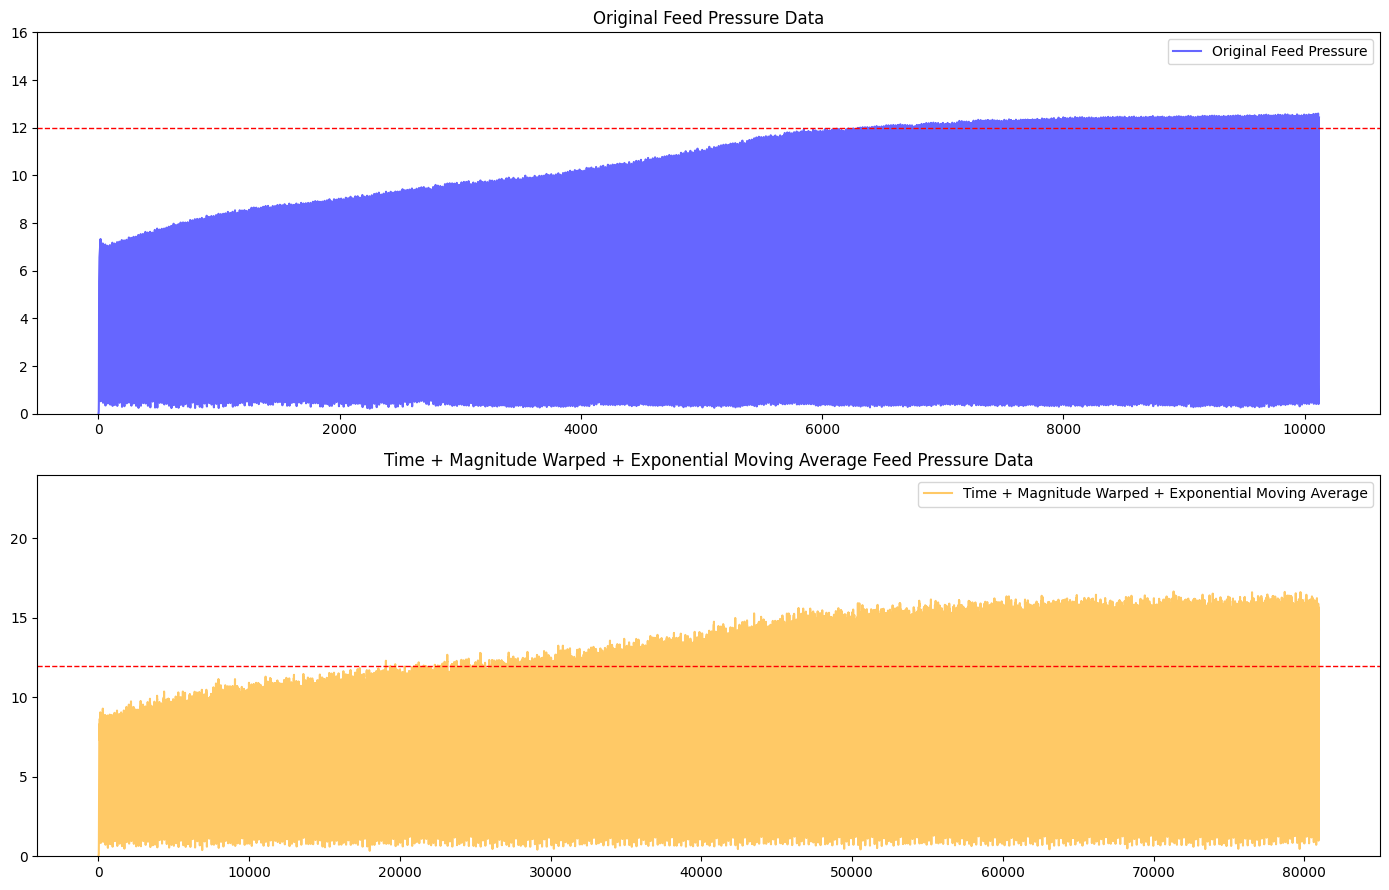

In [ ]:
# 1. 시각화를 위한 설정
%matplotlib inline

# 2. CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/최신_데이터/통합운전데이터.rev01.csv'
df = pd.read_csv(file_name, encoding='CP949')

# 3. 압력 변수 'RO유입 압력(bar)' 열 선택 (압력 변수만 사용)
df = df[['RO유입 압력(bar)']]
df.columns = ['feed_pressure']  # 열 이름을 사용하기 쉽게 변경

# Time Warping 적용 함수 정의
def time_warping(df, warp_factor=2.0):
    original_index = np.arange(df.shape[0])
    warped_index = np.linspace(0, df.shape[0]-1, int(df.shape[0] * warp_factor))

    interpolated_feed_pressure = interp1d(original_index, df['feed_pressure'], kind='linear', fill_value="extrapolate")(warped_index)

    # Time Warping 결과를 새로운 데이터프레임으로 반환
    warped_df = pd.DataFrame(interpolated_feed_pressure, columns=['feed_pressure'])
    return warped_df

# Magnitude Warping 적용 함수 정의
def magnitude_warping(df, factor_range=(0.8, 1.2)):
    factor = np.random.uniform(factor_range[0], factor_range[1], df.shape[0])
    warped_df = df.copy()
    warped_df['feed_pressure'] *= factor  # 각 구간마다 진폭 변형
    return warped_df

# 지수 이동 평균(Exponential Moving Average, EMA) 적용 함수 정의
def apply_exponential_moving_average(df, alpha=0.1):
    df_smoothed = df.copy()
    df_smoothed['feed_pressure'] = df_smoothed['feed_pressure'].ewm(alpha=alpha).mean()
    return df_smoothed

# Time Warping과 Magnitude Warping을 함께 적용하는 함수 정의
def time_and_magnitude_warping(df, warp_factor=1.2, factor_range=(1.0, 1.3), alpha=0.1):
    # Time Warping 적용
    df_time_warped = time_warping(df, warp_factor=warp_factor)

    # Magnitude Warping 적용
    df_time_magnitude_warped = magnitude_warping(df_time_warped, factor_range=factor_range)

    # 지수 이동 평균 적용
    df_time_magnitude_warped_smoothed = apply_exponential_moving_average(df_time_magnitude_warped, alpha=alpha)

    return df_time_magnitude_warped_smoothed

# Time + Magnitude Warping + Exponential Moving Average 적용
df_time_magnitude_warped_smoothed = time_and_magnitude_warping(df, warp_factor=8.0, factor_range=(1.0, 1.4), alpha=0.3)

# 원본 데이터와 Time + Magnitude Warping + Exponential Moving Average 적용 데이터 시각화
plt.figure(figsize=(14, 9))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.axhline(y=12, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 16)

# Time + Magnitude Warping + Exponential Moving Average 적용 데이터 그래프
plt.subplot(2, 1, 2)
plt.plot(df_time_magnitude_warped_smoothed['feed_pressure'], label='Time + Magnitude Warped + Exponential Moving Average', color='orange', alpha=0.6)
plt.title('Time + Magnitude Warped + Exponential Moving Average Feed Pressure Data')
plt.axhline(y=12, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 24)

plt.tight_layout()
plt.show()

## 카만 필터

설명: 카만 필터는 시계열 데이터의 잡음을 줄이기 위한 필터링 기법으로, 이전 상태를 참조하여 현재 상태를 추정합니다. 특히 추정된 상태 값과 측정된 값을 결합하여 데이터를 더 정확하게 만듭니다.   
특징: 실시간으로 업데이트하며 이전 값을 반영하여 예측하는 알고리즘이기 때문에, 연속적인 데이터에 적합합니다.

In [ ]:
!pip install pykalman

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 1.6 MB/s eta 0:00:00


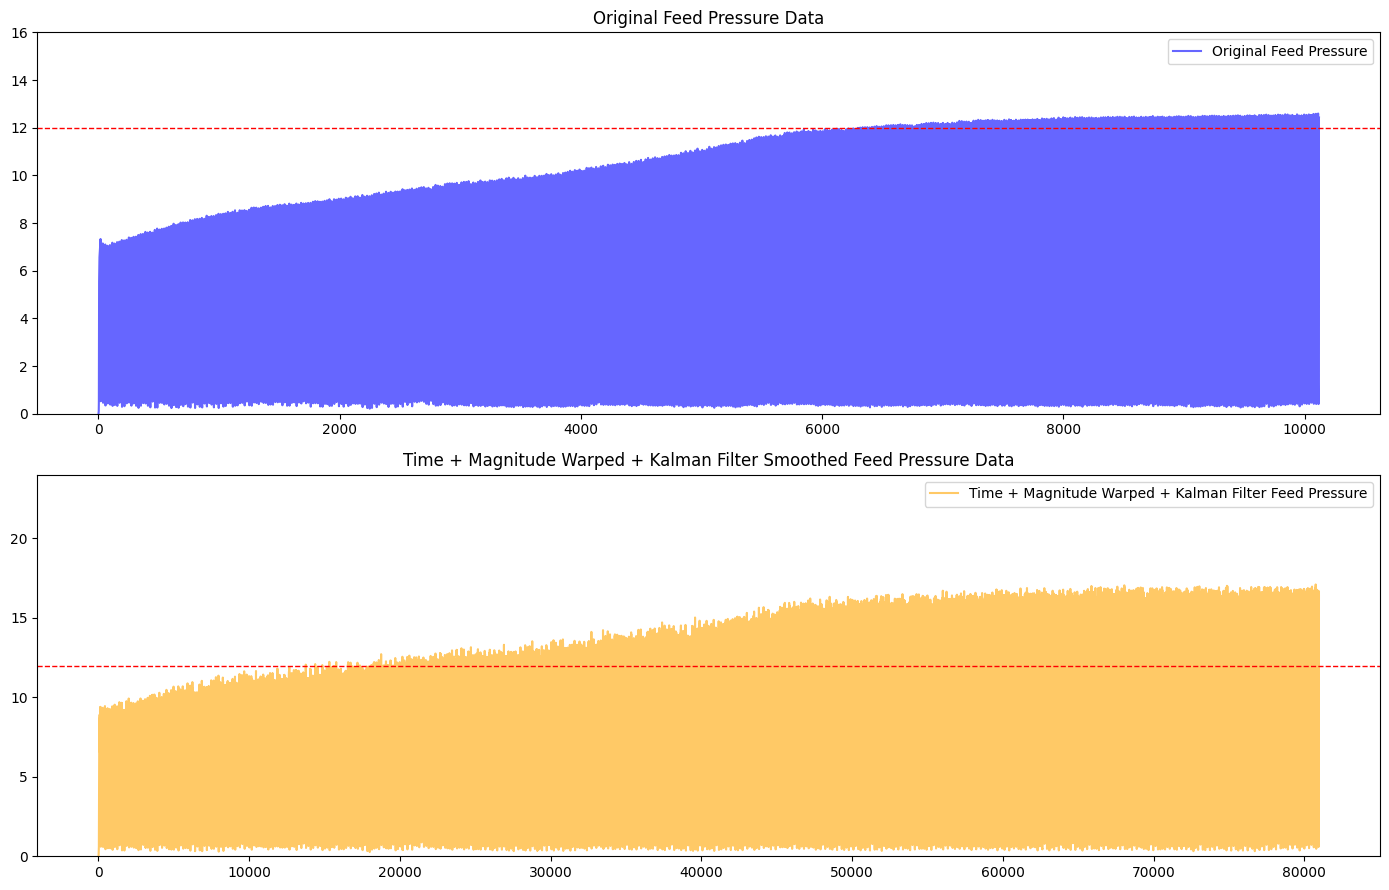

In [ ]:
from pykalman import KalmanFilter

# 1. 시각화를 위한 설정
%matplotlib inline

# 2. CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/최신_데이터/통합운전데이터.rev01.csv'
df = pd.read_csv(file_name, encoding='CP949')

# 3. 압력 변수 'RO유입 압력(bar)' 열 선택 (압력 변수만 사용)
df = df[['RO유입 압력(bar)']]
df.columns = ['feed_pressure']  # 열 이름을 사용하기 쉽게 변경

# Time Warping 적용 함수 정의
def time_warping(df, warp_factor=2.0):
    original_index = np.arange(df.shape[0])
    warped_index = np.linspace(0, df.shape[0]-1, int(df.shape[0] * warp_factor))

    interpolated_feed_pressure = interp1d(original_index, df['feed_pressure'], kind='linear', fill_value="extrapolate")(warped_index)

    # Time Warping 결과를 새로운 데이터프레임으로 반환
    warped_df = pd.DataFrame(interpolated_feed_pressure, columns=['feed_pressure'])
    return warped_df

# Magnitude Warping 적용 함수 정의
def magnitude_warping(df, factor_range=(0.8, 1.2)):
    factor = np.random.uniform(factor_range[0], factor_range[1], df.shape[0])
    warped_df = df.copy()
    warped_df['feed_pressure'] *= factor  # 각 구간마다 진폭 변형
    return warped_df

# 카만 필터(Kalman Filter) 적용 함수 정의
def apply_kalman_filter(df):
    kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
    state_means, _ = kf.filter(df['feed_pressure'].values)
    df_smoothed = pd.DataFrame(state_means, columns=['feed_pressure'])
    return df_smoothed

# Time Warping과 Magnitude Warping을 함께 적용하는 함수 정의
def time_and_magnitude_warping(df, warp_factor=1.2, factor_range=(1.0, 1.3)):
    # Time Warping 적용
    df_time_warped = time_warping(df, warp_factor=warp_factor)

    # Magnitude Warping 적용
    df_time_magnitude_warped = magnitude_warping(df_time_warped, factor_range=factor_range)

    # 카만 필터 적용
    df_time_magnitude_warped_smoothed = apply_kalman_filter(df_time_magnitude_warped)

    return df_time_magnitude_warped_smoothed

# Time + Magnitude Warping + Kalman Filter 적용
df_time_magnitude_warped_smoothed = time_and_magnitude_warping(df, warp_factor=8.0, factor_range=(1.0, 1.4))

# 원본 데이터와 Time + Magnitude Warping + Kalman Filter 적용 데이터 시각화
plt.figure(figsize=(14, 9))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.axhline(y=12, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 16)

# Time + Magnitude Warping + Kalman Filter 적용 데이터 그래프
plt.subplot(2, 1, 2)
plt.plot(df_time_magnitude_warped_smoothed['feed_pressure'], label='Time + Magnitude Warped + Kalman Filter Feed Pressure', color='orange', alpha=0.6)
plt.title('Time + Magnitude Warped + Kalman Filter Smoothed Feed Pressure Data')
plt.axhline(y=12, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 24)

plt.tight_layout()
plt.show()


## ARIMA

설명: ARIMA는 자기회귀(AutoRegressive, AR) 모델과 이동 평균(MA) 모델을 결합한 모델입니다. 이 모델은 자기 회귀(이전 값들의 선형 조합)와 오차 항을 고려해 현재 값을 예측하는 방식입니다.  
ARIMA 모델은 특히 시계열 예측에 강력한 성능을 발휘합니다. 시계열의 자기상관성을 고려해 예측합니다.

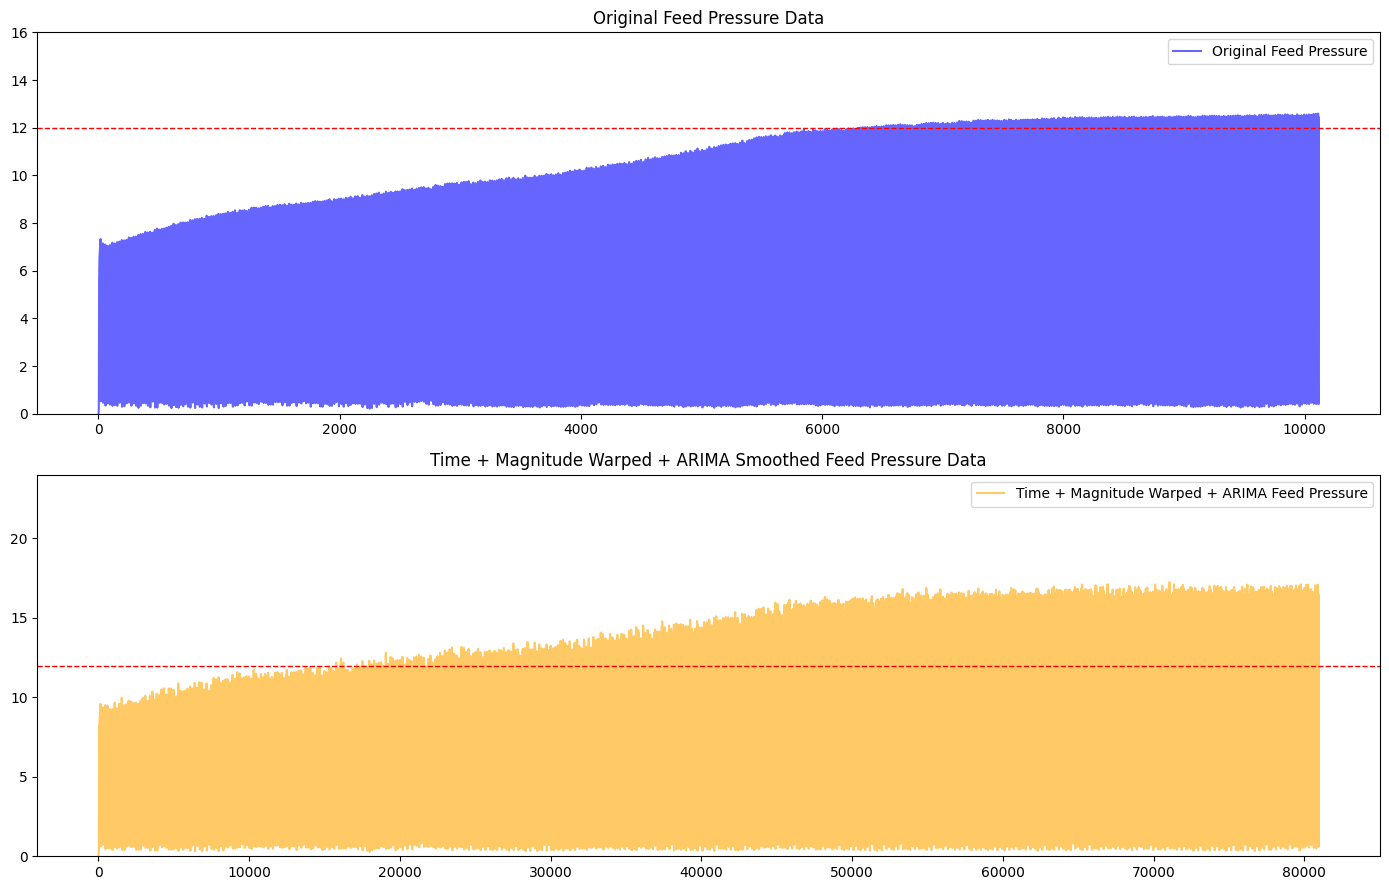

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# 1. 시각화를 위한 설정
%matplotlib inline

# 2. CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/최신_데이터/통합운전데이터.rev01.csv'
df = pd.read_csv(file_name, encoding='CP949')

# 3. 압력 변수 'RO유입 압력(bar)' 열 선택 (압력 변수만 사용)
df = df[['RO유입 압력(bar)']]
df.columns = ['feed_pressure']  # 열 이름을 사용하기 쉽게 변경

# Time Warping 적용 함수 정의
def time_warping(df, warp_factor=2.0):
    original_index = np.arange(df.shape[0])
    warped_index = np.linspace(0, df.shape[0]-1, int(df.shape[0] * warp_factor))

    interpolated_feed_pressure = interp1d(original_index, df['feed_pressure'], kind='linear', fill_value="extrapolate")(warped_index)

    # Time Warping 결과를 새로운 데이터프레임으로 반환
    warped_df = pd.DataFrame(interpolated_feed_pressure, columns=['feed_pressure'])
    return warped_df

# Magnitude Warping 적용 함수 정의
def magnitude_warping(df, factor_range=(0.8, 1.2)):
    factor = np.random.uniform(factor_range[0], factor_range[1], df.shape[0])
    warped_df = df.copy()
    warped_df['feed_pressure'] *= factor  # 각 구간마다 진폭 변형
    return warped_df

# ARIMA 적용 함수 정의
def apply_arima(df, order=(1, 1, 1)):
    model = ARIMA(df['feed_pressure'], order=order)
    model_fit = model.fit()
    df_smoothed = pd.DataFrame(model_fit.fittedvalues, columns=['feed_pressure'])
    return df_smoothed

# Time Warping과 Magnitude Warping을 함께 적용하는 함수 정의
def time_and_magnitude_warping(df, warp_factor=1.2, factor_range=(1.0, 1.3), arima_order=(1, 1, 1)):
    # Time Warping 적용
    df_time_warped = time_warping(df, warp_factor=warp_factor)

    # Magnitude Warping 적용
    df_time_magnitude_warped = magnitude_warping(df_time_warped, factor_range=factor_range)

    # ARIMA 적용
    df_time_magnitude_warped_smoothed = apply_arima(df_time_magnitude_warped, order=arima_order)

    return df_time_magnitude_warped_smoothed

# Time + Magnitude Warping + ARIMA 적용
df_time_magnitude_warped_smoothed = time_and_magnitude_warping(df, warp_factor=8.0, factor_range=(1.0, 1.4), arima_order=(1, 1, 1))

# 원본 데이터와 Time + Magnitude Warping + ARIMA 적용 데이터 시각화
plt.figure(figsize=(14, 9))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.axhline(y=12, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 16)

# Time + Magnitude Warping + ARIMA 적용 데이터 그래프
plt.subplot(2, 1, 2)
plt.plot(df_time_magnitude_warped_smoothed['feed_pressure'], label='Time + Magnitude Warped + ARIMA Feed Pressure', color='orange', alpha=0.6)
plt.title('Time + Magnitude Warped + ARIMA Smoothed Feed Pressure Data')
plt.axhline(y=12, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 24)

plt.tight_layout()
plt.show()


## 지수평활법

설명: 과거 데이터에 더 많은 가중치를 부여하며, 추세와 계절성을 반영하여 예측하는 기법입니다. 지수 이동 평균과 비슷하지만, 단순한 단일 지수 평활법(Single Exponential Smoothing) 외에도 추세와 계절성을 반영하는 이중 지수 평활법(Double Exponential Smoothing) 및 삼중 지수 평활법(Triple Exponential Smoothing, Holt-Winters) 등이 있습니다.

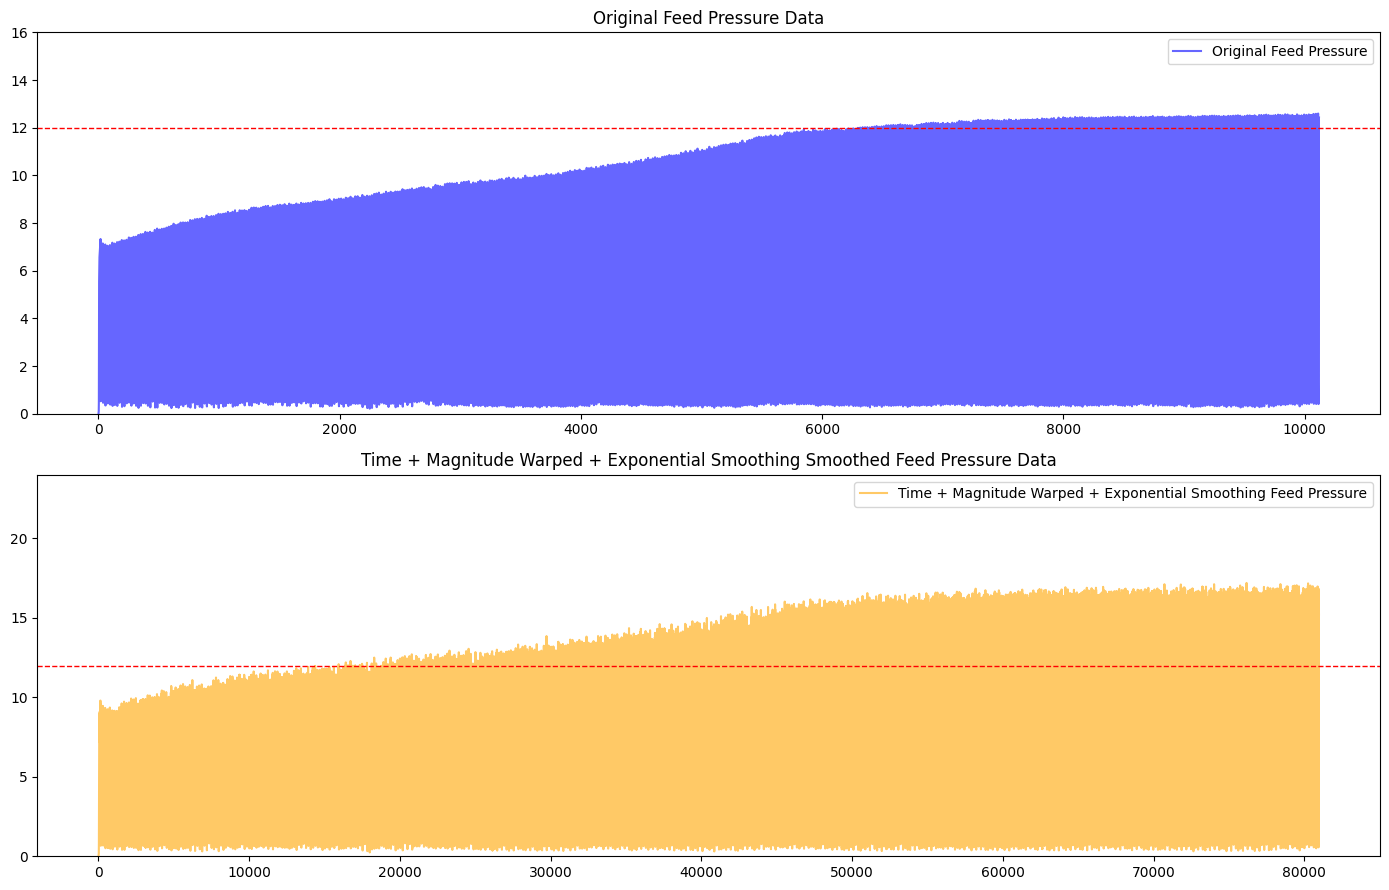

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 1. 시각화를 위한 설정
%matplotlib inline

# 2. CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/최신_데이터/통합운전데이터.rev01.csv'
df = pd.read_csv(file_name, encoding='CP949')

# 3. 압력 변수 'RO유입 압력(bar)' 열 선택 (압력 변수만 사용)
df = df[['RO유입 압력(bar)']]
df.columns = ['feed_pressure']  # 열 이름을 사용하기 쉽게 변경

# Time Warping 적용 함수 정의
def time_warping(df, warp_factor=2.0):
    original_index = np.arange(df.shape[0])
    warped_index = np.linspace(0, df.shape[0]-1, int(df.shape[0] * warp_factor))

    interpolated_feed_pressure = interp1d(original_index, df['feed_pressure'], kind='linear', fill_value="extrapolate")(warped_index)

    # Time Warping 결과를 새로운 데이터프레임으로 반환
    warped_df = pd.DataFrame(interpolated_feed_pressure, columns=['feed_pressure'])
    return warped_df

# Magnitude Warping 적용 함수 정의
def magnitude_warping(df, factor_range=(0.8, 1.2)):
    factor = np.random.uniform(factor_range[0], factor_range[1], df.shape[0])
    warped_df = df.copy()
    warped_df['feed_pressure'] *= factor  # 각 구간마다 진폭 변형
    return warped_df

# 지수 평활법(Exponential Smoothing) 적용 함수 정의
def apply_exponential_smoothing(df, trend='add', seasonal=None, seasonal_periods=None):
    model = ExponentialSmoothing(df['feed_pressure'], trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    model_fit = model.fit()
    df_smoothed = pd.DataFrame(model_fit.fittedvalues, columns=['feed_pressure'])
    return df_smoothed

# Time Warping과 Magnitude Warping을 함께 적용하는 함수 정의
def time_and_magnitude_warping(df, warp_factor=1.2, factor_range=(1.0, 1.3), trend='add', seasonal=None, seasonal_periods=None):
    # Time Warping 적용
    df_time_warped = time_warping(df, warp_factor=warp_factor)

    # Magnitude Warping 적용
    df_time_magnitude_warped = magnitude_warping(df_time_warped, factor_range=factor_range)

    # 지수 평활법 적용
    df_time_magnitude_warped_smoothed = apply_exponential_smoothing(df_time_magnitude_warped, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)

    return df_time_magnitude_warped_smoothed

# Time + Magnitude Warping + Exponential Smoothing 적용
df_time_magnitude_warped_smoothed = time_and_magnitude_warping(df, warp_factor=8.0, factor_range=(1.0, 1.4), trend='add', seasonal=None)

# 원본 데이터와 Time + Magnitude Warping + Exponential Smoothing 적용 데이터 시각화
plt.figure(figsize=(14, 9))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.axhline(y=12, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 16)

# Time + Magnitude Warping + Exponential Smoothing 적용 데이터 그래프
plt.subplot(2, 1, 2)
plt.plot(df_time_magnitude_warped_smoothed['feed_pressure'], label='Time + Magnitude Warped + Exponential Smoothing Feed Pressure', color='orange', alpha=0.6)
plt.title('Time + Magnitude Warped + Exponential Smoothing Smoothed Feed Pressure Data')
plt.axhline(y=12, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 24)

plt.tight_layout()
plt.show()

## LSTM
설명: LSTM은 **순환 신경망(RNN)**의 한 종류로, 시계열 데이터에서 장기 종속성을 학습할 수 있습니다. LSTM은 이전 값을 기억하고, 그 정보를 기반으로 다음 값을 예측할 수 있습니다.  
특징: 딥러닝 기반이므로 많은 데이터를 학습할 수 있고, 시계열 데이터의 패턴을 복잡하게 학습할 수 있습니다.


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


474/474 ━━━━━━━━━━━━━━━━━━━━ 60s 30ms/step - loss: 0.0554
Epoch 2/25
474/474 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - loss: 0.0141
Epoch 3/25
474/474 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - loss: 0.0128
Epoch 4/25
474/474 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - loss: 0.0112
Epoch 5/25
474/474 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - loss: 0.0108
Epoch 6/25
474/474 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - loss: 0.0100
Epoch 7/25
474/474 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - loss: 0.0099
Epoch 8/25
474/474 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - loss: 0.0096
Epoch 9/25
474/474 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - loss: 0.0098
Epoch 10/25
474/474 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - loss: 0.0096
Epoch 11/25
474/474 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - loss: 0.0095
Epoch 12/25
474/474 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - loss: 0.0094
Epoch 13/25
474/474 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - loss: 0.0092
Epoch 14/25
474/474 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - loss: 0.0091
Epoch 15/25
474/474 ━━━━━━━━━━━━━━━━━━━━

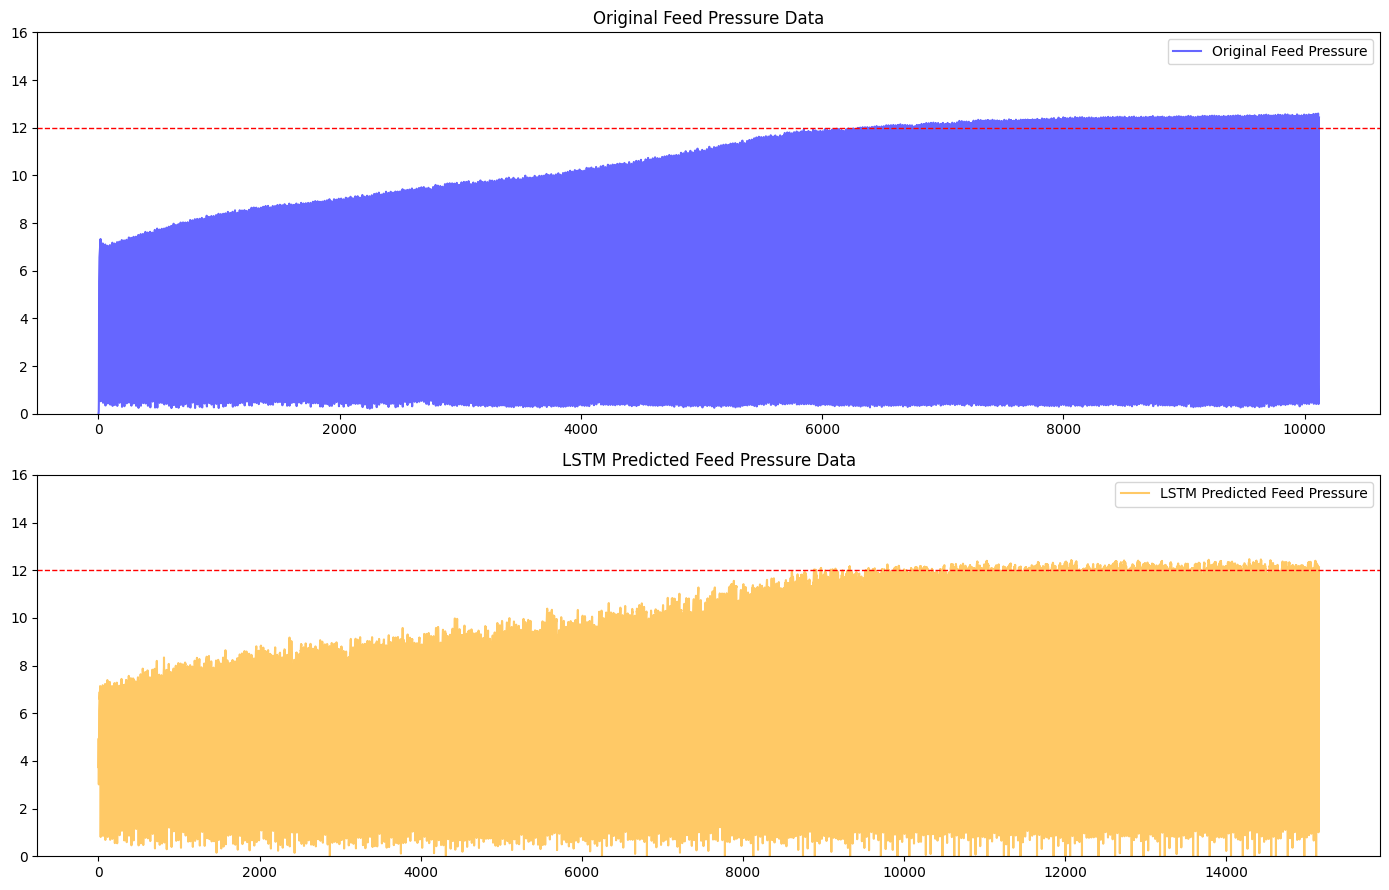

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from scipy.interpolate import interp1d

# 1. 시각화를 위한 설정
%matplotlib inline

# 2. CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/최신_데이터/통합운전데이터.rev01.csv'
df = pd.read_csv(file_name, encoding='CP949')

# 3. 압력 변수 'RO유입 압력(bar)' 열 선택 (압력 변수만 사용)
df = df[['RO유입 압력(bar)']]
df.columns = ['feed_pressure']  # 열 이름을 사용하기 쉽게 변경

# 4. 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['feed_pressure']])

# Time Warping 적용 함수 정의
def time_warping(df, warp_factor=2.0):
    original_index = np.arange(df.shape[0])
    warped_index = np.linspace(0, df.shape[0]-1, int(df.shape[0] * warp_factor))

    interpolated_feed_pressure = interp1d(original_index, df['feed_pressure'], kind='linear', fill_value="extrapolate")(warped_index)

    # Time Warping 결과를 새로운 데이터프레임으로 반환
    warped_df = pd.DataFrame(interpolated_feed_pressure, columns=['feed_pressure'])
    return warped_df

# Magnitude Warping 적용 함수 정의
def magnitude_warping(df, factor_range=(0.8, 1.2)):
    factor = np.random.uniform(factor_range[0], factor_range[1], df.shape[0])
    warped_df = df.copy()
    warped_df['feed_pressure'] *= factor  # 각 구간마다 진폭 변형
    return warped_df

# Time Warping 및 Magnitude Warping을 적용
time_warped_data = time_warping(df, warp_factor=1.5)  # Time Warping 적용
magnitude_warped_data = magnitude_warping(time_warped_data)  # Magnitude Warping 적용

# 5. 시계열 데이터 시퀀스 생성 함수 정의
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        label = data[i+sequence_length]
        sequences.append(sequence)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# 시계열 데이터 생성 및 정규화 (증강된 데이터 사용)
warped_scaled_data = scaler.fit_transform(magnitude_warped_data[['feed_pressure']])
sequence_length = 30  # 시퀀스 길이 설정
X, y = create_sequences(warped_scaled_data, sequence_length)

# 6. LSTM 모델 정의 및 학습
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# 7. EarlyStopping 콜백 정의
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# 8. 모델 컴파일 및 학습 (epochs 25로 설정)
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=25, batch_size=32, callbacks=[early_stopping])

# 9. 예측 수행
predicted = model.predict(X)

# 10. 예측 결과를 원래 스케일로 역변환
predicted = scaler.inverse_transform(predicted)

# 11. 원본 데이터와 예측 데이터 시각화
plt.figure(figsize=(14, 9))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.axhline(y=12, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 16)

# 예측된 데이터 그래프
plt.subplot(2, 1, 2)
plt.plot(predicted, label='LSTM Predicted Feed Pressure', color='orange', alpha=0.6)
plt.title('LSTM Predicted Feed Pressure Data')
plt.axhline(y=12, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 16)

plt.tight_layout()
plt.show()

## Polynomial Regression (다항 회귀)

설명: 데이터의 비선형성을 반영하기 위해 다항 회귀를 적용할 수 있습니다. 이전 값들을 다항식으로 회귀 분석하여 더 복잡한 패턴을 학습할 수 있습니다.

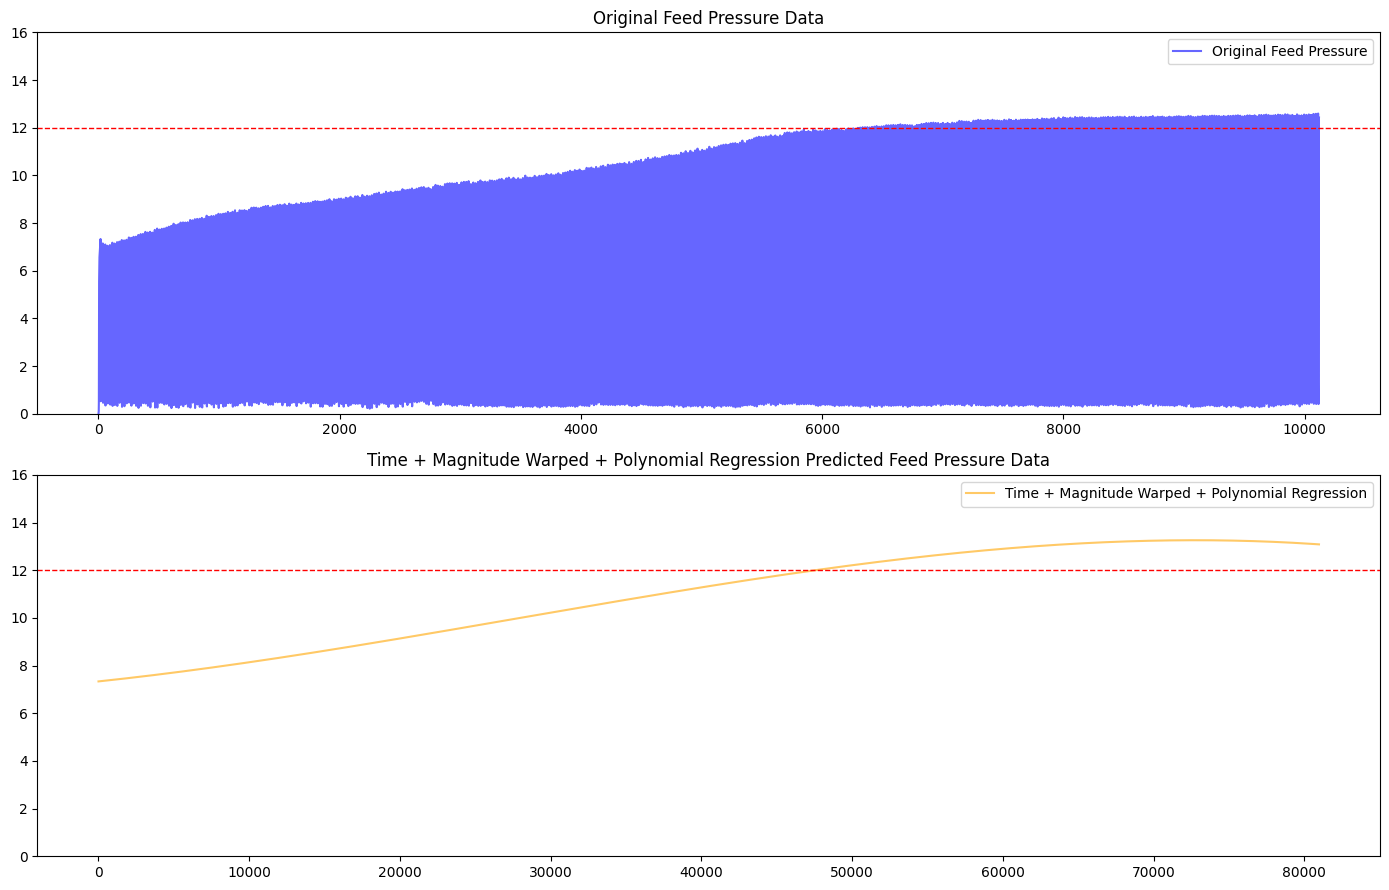

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# 1. 시각화를 위한 설정
%matplotlib inline

# 2. CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/최신_데이터/통합운전데이터.rev01.csv'
df = pd.read_csv(file_name, encoding='CP949')

# 3. 압력 변수 'RO유입 압력(bar)' 열 선택 (압력 변수만 사용)
df = df[['RO유입 압력(bar)']]
df.columns = ['feed_pressure']  # 열 이름을 사용하기 쉽게 변경

# 4. 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['feed_pressure']])

# 5. 다항 회귀(Polynomial Regression) 적용 함수 정의
def apply_polynomial_regression(df, degree=2):
    X = np.arange(len(df)).reshape(-1, 1)  # 인덱스 값
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # 다항 회귀 모델 적용
    model = LinearRegression()
    model.fit(X_poly, df['feed_pressure'])

    # 예측 값
    predicted = model.predict(X_poly)
    return predicted

# Time Warping과 Magnitude Warping을 함께 적용하는 함수 정의
def time_and_magnitude_warping(df, warp_factor=1.2, factor_range=(1.0, 1.3), degree=2):
    # Time Warping 적용
    df_time_warped = time_warping(df, warp_factor=warp_factor)

    # Magnitude Warping 적용
    df_time_magnitude_warped = magnitude_warping(df_time_warped, factor_range=factor_range)

    # 다항 회귀 적용
    df_time_magnitude_warped_smoothed = apply_polynomial_regression(df_time_magnitude_warped, degree=degree)

    return df_time_magnitude_warped_smoothed

# Time + Magnitude Warping + Polynomial Regression 적용
predicted_polynomial = time_and_magnitude_warping(df, warp_factor=8.0, factor_range=(1.0, 1.4), degree=3)

# 원본 데이터와 Time + Magnitude Warping + Polynomial Regression 적용 데이터 시각화
plt.figure(figsize=(14, 9))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.axhline(y=12, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 16)

# 다항 회귀 예측 데이터 그래프
plt.subplot(2, 1, 2)
plt.plot(predicted_polynomial, label='Time + Magnitude Warped + Polynomial Regression', color='orange', alpha=0.6)
plt.title('Time + Magnitude Warped + Polynomial Regression Predicted Feed Pressure Data')
plt.axhline(y=12, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 16)

plt.tight_layout()
plt.show()


## 가우시안 노이즈

목적: 원본 데이터와 유사하지만 더 뚜렷한 변화 패턴 생성

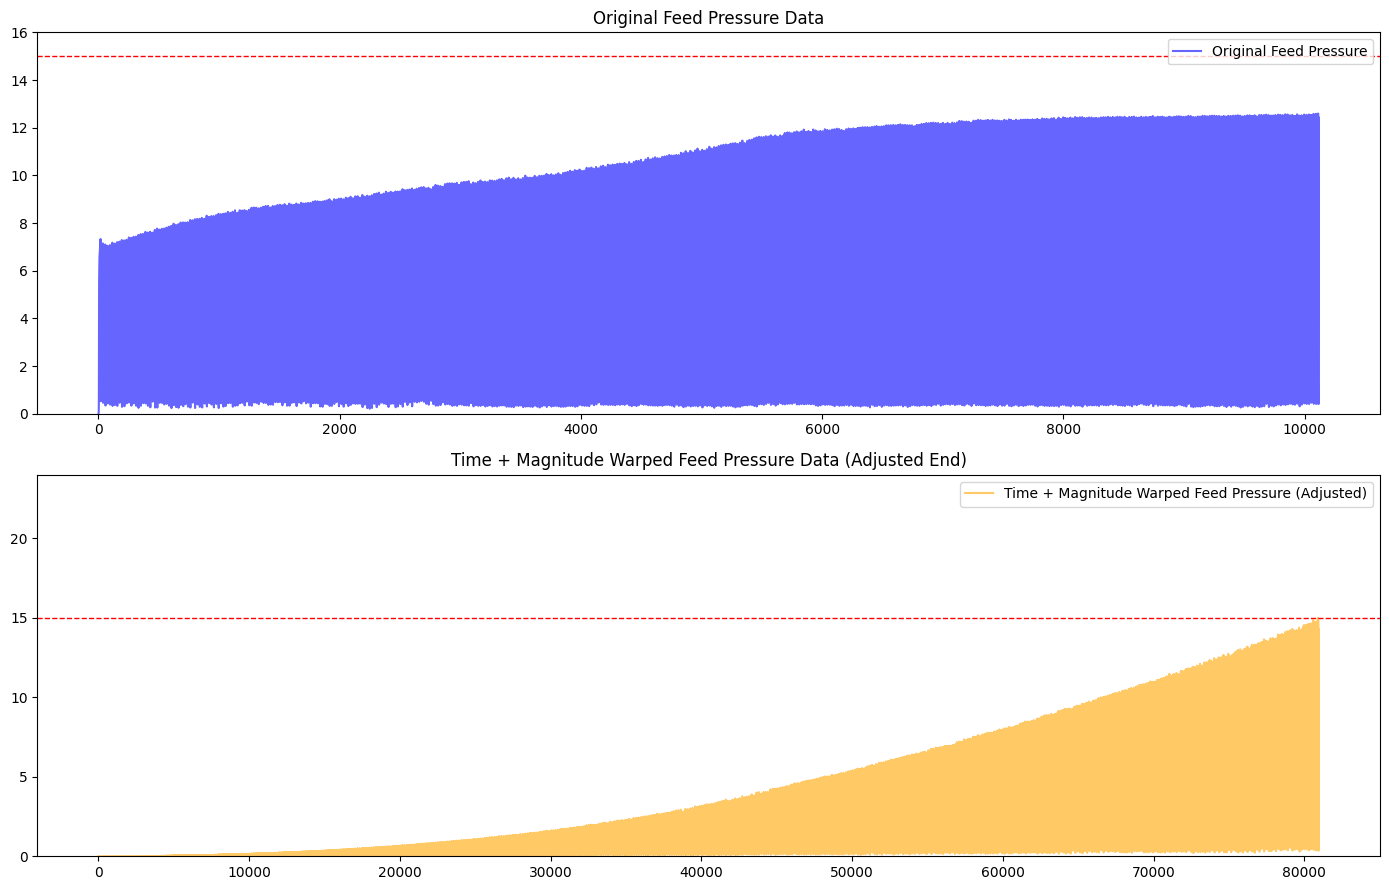

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 1. 시각화를 위한 설정
%matplotlib inline

# 2. CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/최신_데이터/통합운전데이터.rev01.csv'
df = pd.read_csv(file_name, encoding='CP949')

# 3. 압력 변수 'RO유입 압력(bar)' 열 선택 (압력 변수만 사용)
df = df[['RO유입 압력(bar)']]
df.columns = ['feed_pressure']  # 열 이름을 사용하기 쉽게 변경

# Time Warping 적용 함수 정의
def time_warping(df, warp_factor=2.0):
    original_index = np.arange(df.shape[0])
    warped_index = np.linspace(0, df.shape[0]-1, int(df.shape[0] * warp_factor))

    interpolated_feed_pressure = interp1d(original_index, df['feed_pressure'], kind='linear', fill_value="extrapolate")(warped_index)

    # Time Warping 결과를 새로운 데이터프레임으로 반환
    warped_df = pd.DataFrame(interpolated_feed_pressure, columns=['feed_pressure'])
    return warped_df

# Magnitude Warping 적용 함수 정의
def magnitude_warping(df, factor_range=(0.8, 1.2)):
    factor = np.random.uniform(factor_range[0], factor_range[1], df.shape[0])
    warped_df = df.copy()
    warped_df['feed_pressure'] *= factor  # 각 구간마다 진폭 변형
    return warped_df

# 마지막 값을 설정된 값에 도달하도록 보정하는 함수 (완만한 증가 후 급격한 증가)
def adjust_increase_pattern(df, target_value=12):
    df_adjusted = df.copy()
    original_length = len(df_adjusted)

    # 곡선 형태를 만들기 위해 x^2 형태로 증가하도록 설계
    x = np.linspace(0, 1, original_length)
    curve_factor = x ** 2

    # 피드 압력 값을 점진적으로 보정
    df_adjusted['feed_pressure'] = (df_adjusted['feed_pressure'] * curve_factor) / df_adjusted['feed_pressure'].max() * target_value
    return df_adjusted

# Time Warping과 Magnitude Warping을 함께 적용하는 함수 정의
def time_and_magnitude_warping(df, warp_factor=1.2, factor_range=(1.0, 1.3), target_value=15):
    df_time_warped = time_warping(df, warp_factor=warp_factor)

    df_time_magnitude_warped = magnitude_warping(df_time_warped, factor_range=factor_range)

    # 마지막 값을 설정된 값에 맞춰 조정
    df_adjusted = adjust_increase_pattern(df_time_magnitude_warped, target_value=target_value)

    return df_adjusted

# Time + Magnitude Warping 적용 후 마지막 값 보정
df_time_magnitude_warped = time_and_magnitude_warping(df, warp_factor=8.0, factor_range=(1.0, 1.4), target_value=15)

# 원본 데이터와 Time + Magnitude Warping 적용 데이터 시각화
plt.figure(figsize=(14, 9))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.axhline(y=15, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 16)

# Time + Magnitude Warping + 보정 적용 데이터 그래프
plt.subplot(2, 1, 2)
plt.plot(df_time_magnitude_warped['feed_pressure'], label='Time + Magnitude Warped Feed Pressure (Adjusted)', color='orange', alpha=0.6)
plt.title('Time + Magnitude Warped Feed Pressure Data (Adjusted End)')
plt.axhline(y=15, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 24)

plt.tight_layout()
plt.show()


## 특정 구간에 변화 추가

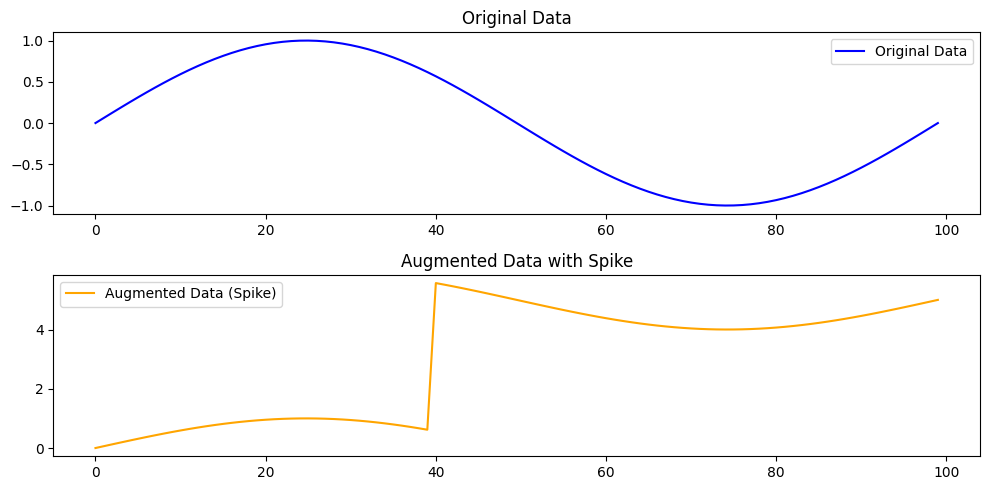

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 원본 데이터 생성 (평탄한 데이터)
original_data = np.sin(np.linspace(0, 2 * np.pi, 100))

# 특정 구간에 변화를 주는 함수
def augment_data_with_spike(data, spike_value=5, spike_position=50):
    augmented_data = data.copy()
    augmented_data[spike_position:] += spike_value  # 특정 위치 이후로 스파이크를 추가
    return augmented_data

# 데이터 증강 (변화 추가)
augmented_data = augment_data_with_spike(original_data, spike_value=5, spike_position=40)

# 데이터 시각화
plt.figure(figsize=(10, 5))

# 원본 데이터 시각화
plt.subplot(2, 1, 1)
plt.plot(original_data, label='Original Data', color='blue')
plt.title('Original Data')
plt.legend()

# 증강된 데이터 시각화
plt.subplot(2, 1, 2)
plt.plot(augmented_data, label='Augmented Data (Spike)', color='orange')
plt.title('Augmented Data with Spike')
plt.legend()

plt.tight_layout()
plt.show()


## 구간 삽입 및 스파이크 추가

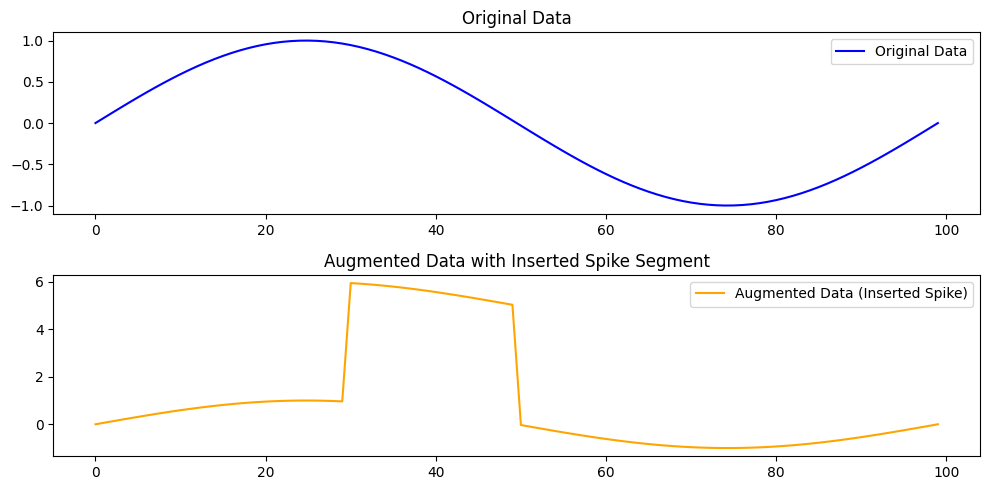

In [ ]:
# 데이터 증강 (구간 삽입 및 스파이크 추가)
def insert_spike_segment(data, spike_value=5, start_position=30, end_position=60):
    augmented_data = data.copy()
    augmented_data[start_position:end_position] += spike_value  # 중간 구간에 스파이크를 추가
    return augmented_data

# 스파이크 추가된 데이터
augmented_data_with_segment = insert_spike_segment(original_data, spike_value=5, start_position=30, end_position=50)

# 시각화
plt.figure(figsize=(10, 5))

# 원본 데이터 시각화
plt.subplot(2, 1, 1)
plt.plot(original_data, label='Original Data', color='blue')
plt.title('Original Data')
plt.legend()

# 스파이크가 추가된 데이터 시각화
plt.subplot(2, 1, 2)
plt.plot(augmented_data_with_segment, label='Augmented Data (Inserted Spike)', color='orange')
plt.title('Augmented Data with Inserted Spike Segment')
plt.legend()

plt.tight_layout()
plt.show()


떨어지는 값이 일정하지가 않다. 다른 여러 개의 데이터를 사용해서 만들어보자

## 시간 추가하기

<ipython-input-14-1639b717a131>:14: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['time'] = pd.date_range(start=start_time, periods=len(df), freq='T')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1400x900 with 0 Axes>

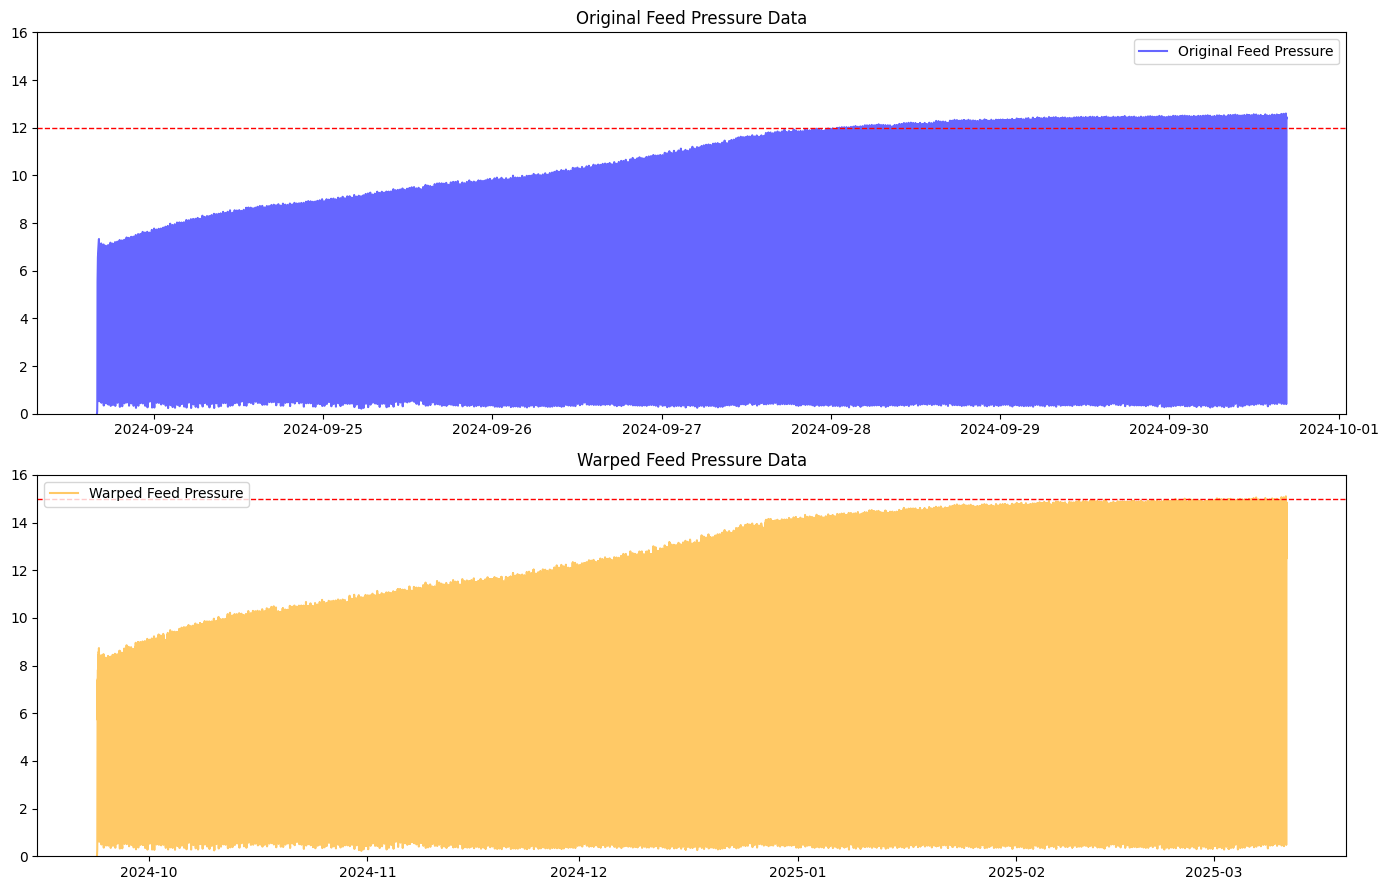

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from scipy.interpolate import interp1d
from google.colab import files

# 1. 시각화를 위한 설정
%matplotlib inline

# 2. CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/최신_데이터/통합운전데이터.rev01.csv'
df = pd.read_csv(file_name, encoding='CP949')

# 3. 압력 변수 'RO유입 압력(bar)' 열 선택 (압력 변수만 사용)
df = df[['RO유입 압력(bar)']]
df.columns = ['feed_pressure']

# 4. 시간 열 추가 (시작 시간: '2024-09-23 15:57:31')
start_time = pd.to_datetime('2024-09-23 15:57:31')
df['time'] = pd.date_range(start=start_time, periods=len(df), freq='T')

# Time Warping 적용 함수 정의
def time_warping(df, warp_factor=2.0):
    original_index = np.arange(df.shape[0])
    warped_index = np.linspace(0, df.shape[0]-1, int(df.shape[0] * warp_factor))

    interpolated_feed_pressure = interp1d(original_index, df['feed_pressure'], kind='linear', fill_value="extrapolate")(warped_index)

    # Time Warping 결과를 새로운 데이터프레임으로 반환
    warped_df = pd.DataFrame(interpolated_feed_pressure, columns=['feed_pressure'])
    return warped_df

# Time Warping 적용 함수 정의
def time_warping(df, warp_factor=2.0):
    original_index = np.arange(df.shape[0])
    warped_index = np.linspace(0, df.shape[0]-1, int(df.shape[0] * warp_factor))

    interpolated_feed_pressure = interp1d(original_index, df['feed_pressure'], kind='linear', fill_value="extrapolate")(warped_index)

    # Time Warping 결과를 새로운 데이터프레임으로 반환
    time_interval_seconds = (df['time'].iloc[1] - df['time'].iloc[0]).total_seconds()  # 초 단위 시간 간격 계산 (1분 간격)
    warped_time = df['time'].iloc[0] + pd.to_timedelta(np.arange(len(warped_index)) * time_interval_seconds, unit='s')

    warped_df = pd.DataFrame({'time': warped_time, 'feed_pressure': interpolated_feed_pressure})
    return warped_df

# Magnitude Warping 적용 함수 정의
def magnitude_warping(df, factor_range=(1.0, 1.2)):
    factor = np.random.uniform(factor_range[0], factor_range[1], df.shape[0])
    warped_df = df.copy()
    warped_df['feed_pressure'] *= factor  # 각 구간마다 진폭 변형
    return warped_df

# Time Warping 및 Magnitude Warping을 적용
time_warped_data = time_warping(df, warp_factor=24.0)  # Time Warping 적용
magnitude_warped_data = magnitude_warping(time_warped_data)  # Magnitude Warping 적용

# 변형된 데이터를 CSV 파일로 저장
#magnitude_warped_data.to_csv('warped_feed_pressure_with_time.csv', index=False)

# CSV 파일 다운로드
files.download('warped_feed_pressure_with_time.csv')

# 변형된 데이터 시각화
plt.figure(figsize=(14, 9))

# 원본 데이터와 Time + Magnitude Warping 적용 데이터 시각화
plt.figure(figsize=(14, 9))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(df['time'], df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.axhline(y=12, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 16)

# 변형된 데이터 그래프
plt.subplot(2, 1, 2)
plt.plot(magnitude_warped_data['time'], magnitude_warped_data['feed_pressure'], label='Warped Feed Pressure', color='orange', alpha=0.6)
plt.title('Warped Feed Pressure Data')
plt.axhline(y=15, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 16)

plt.tight_layout()
plt.show()


Final Data with 3 Copies Added:
                 time  feed_pressure
0 2024-04-07 23:33:31       0.000000
1 2024-04-07 23:34:31       0.003304
2 2024-04-07 23:35:31       0.006620
3 2024-04-07 23:36:31       0.009646
4 2024-04-07 23:37:31       0.014007
Final data with copies saved to four-cycle-16months.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

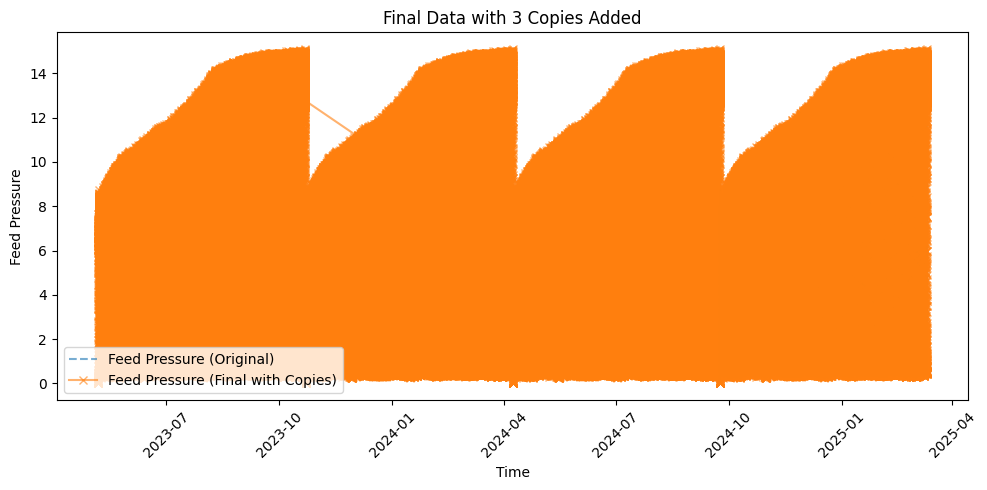

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from google.colab import files

# CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/전처리.ipynb/warped_feed_pressure_with_time.csv'
df = pd.read_csv(file_name, encoding='CP949')

# 시간 열을 datetime 형식으로 변환
df['time'] = pd.to_datetime(df['time'])

# 증강된 데이터를 3번 복사하여 앞에 추가
num_copies = 3
augmented_data_list = []

for i in range(1, num_copies + 1):
    temp_data = df.copy()
    # Time 데이터를 각 복사본마다 1분씩 감소
    temp_data['time'] = temp_data['time'] - pd.to_timedelta(i * len(temp_data), unit='m')
    augmented_data_list.append(temp_data)

# 복사된 데이터를 기존 데이터 앞에 붙이기
df_final = pd.concat(augmented_data_list + [df]).reset_index(drop=True)

# 시간 열을 datetime 형식으로 변환
df_final['time'] = pd.to_datetime(df_final['time'])

# 결과 확인
print("\nFinal Data with 3 Copies Added:")
print(df_final.head())

# 최종 데이터를 엑셀 파일로 저장
output_file = 'four-cycle-16months.xlsx'
df_final.to_excel(output_file, index=False)
print(f"Final data with copies saved to {output_file}")

# 파일 다운로드
files.download(output_file)

# 데이터 시각화
plt.figure(figsize=(10, 5))

# 원본 데이터와 증강된 데이터 시각화
plt.plot(df['time'], df['feed_pressure'], label='Feed Pressure (Original)', linestyle='--', alpha=0.6)
plt.plot(df_final['time'], df_final['feed_pressure'], label='Feed Pressure (Final with Copies)', marker='x', alpha=0.6)

plt.xlabel('Time')
plt.ylabel('Feed Pressure')
plt.title('Final Data with 3 Copies Added')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()